# BIPN 162 Final Project: Using Improved Deep Neural Network to Perform Dimension Reduction and Cell Classification by Analyzing scRNA-seq data

### Team Members:
- Jason Chen
- Xuanyu Dong
- Zhiran Xie

# Overview / Abstract
In the project, we selected a new deep neural network method to collect and analyze cell-types with their RNAseq counts of genes based on biological  pathways knowledge. We implemented the original dataset to reproduce the clustering visualization and pathway analysis. Then we introduced another new preprocessed dataset to validate the feability of this new architecture of neural network with clustering visualization and pathway analysis.

# Acknowledgement


In the zip file we submitted, datasets will not be provided due to the size and it stores in the google drive. 

Link to the project Google Drive: https://drive.google.com/drive/folders/1ghra1wQadp6Wgw9a9jHDz4WnCfACrIoJ?usp=sharing

# Introduction

In the project, we selected a new deep neural network(DNN) architecture that integrates signaling pathway knowledge to perform clustering analysis of single cell samples based on their RNAseq counts of genes. The advantage of this new architecture is that while maintaining a high accuracy score for clustering analysis, the clustering results are also biologically meaningful.

We implemented the original human melanoma tumor dataset into DNN as the procedure provided by paper to reproduce clustering results of immune cells in the dataset along with top ten pathways mentioned in the paper. Then, we further tested this new DNN architecture with mice dataset of RNAseq counts for different genes to evaluate the advantages of accurate cell clustering along with biologically meaningful underlying given similar format of dataset but different species.

# Background

##### **A. Prior work: Include explanation of the work done previously. Include some scientific background to orient the reader to the question being addressed. Include citations or links.**
  Identifying cell phenotypes based on genotypes has been one of the main techniques used in biology and previously developed methods have several limitations such as lack of commonality due to variation in the cell characteristics. Therefore, analysis of single-cell RNA sequencing (scRNA-seq) is adopted to obtain transcriptome information at individual cell level. Though scRNA-seq provides identification of cell types and states based on cellular heterogeneity and disease, allowing the detection of unclear expression and unknown transcripts, the computing power of processing larger amount of data is required. After Deep neural networks are introduced to this field, its lack of biological interpretability is under questioned. 

> Citation: 
>
>Hwang, B., Lee, J.H. & Bang, D. Single-cell RNA sequencing technologies and bioinformatics pipelines. Exp Mol Med 50, 1–14 (2018). https://doi.org/10.1038/s12276-018-0071-8
Gundogdu, P., Loucera, C., Alamo-Alvarez, I. et al. Integrating pathway knowledge with deep neural networks to reduce the dimensionality in single-cell RNA-seq data. BioData Mining 15, 1 (2022). https://doi.org/10.1186/s13040-021-00285-4 


##### **B. Describe the paper you used and the method you will be studying.**
In the paper we chose, the researcher introduced a new neural network (deep neural network) based on the different biological information including signaling pathways to reduce the dimensionality of the data, thus providing a precise identification of cells through querying the dataset. Therefore, the signaling pathway method improves the accuracy and efficiency of prediction along with reduced dimensionality of data characteristics. In addition, the signaling pathway method also provided an easier interpretation of the results by connecting the features and cell function. They tested with a dataset of human melanoma tumor cells. 

##### **C. Include the specific scientific question addressed by the method.**
The improvement of DNN is based on reduced dimensionality of cell characteristics, specifically, the biological signaling pathway. The pathway is used to define the cluster of genes grouped based on common functionality. The method is aim to demonstrate how we could utilize the integration of pathway as biological characteristics to analyze and classify the cell types while generate interpretable model and result. Therefore, this nerual network could provide us a biological relevance of cell type and related mechanisms behind that.


##### **D. What’s in the paper? Explain what aspects of the model/ scientific results you aim to replicate.**
The aim of this method is to pursue the analysis with clear interpretation and a fast training process. We proposed that this method could provide a way to illustrate the biological mechanism behind DNN with the characteristics of protein interaction captured with the DNN architectures. We will generate 2-D TSNE and Clustering analysis plots that represent our classification results for the cells in our additional dataset.


# Replication

In [ ]:
# Install required packages:
import pandas as pd
import numpy as np
# pyreadr is a package to read r datasets
import pyreadr
import datetime as dt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.neighbors import LocalOutlierFactor
import glob
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Wrangling

We downloaded the original RNAseq dataset for human melanoma tumor in .rds format (reference.rds.gz) from the link provided in the link_for_external_dataset.md in references folder. Then, we moved the downloaded dataset into data/external directory as the required location for importing dataset into 1.0-pg-converting-datasets-into-pck.ipynb. Following the procedure in Melanoma reference section, this .ipynb file converts our dataset into .pck file. 

Then we used the following command in terminal to perform data normalization: sh preprocessing.sh

The shell script will run a python program called 2.0-pg-preprocessing-dataset.py. This python program will both sample-wise log1p normalization and then gene-wise log1p normalization for RNAseq counts in the dataset. These normalization process allows the dataset to be used for our deep neural network training and testing.

In [ ]:
# Read original dataset
df_raw = pyreadr.read_r("/content/drive/MyDrive/BIPN-162-Project/Reproduce/data/external/exper_melanoma/reference.rds")[None]
print(df_raw.shape)
print(df_raw.info())
# Print original dataset
df_raw

(2761, 17995)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Columns: 17995 entries, A1BG to label
dtypes: float64(17994), object(1)
memory usage: 379.1+ MB
None


A1BG  A1CF   A2M  A2ML1  A4GALT  A4GNT  AAAS  AACS  AADAC  AADACL2  \
0      5.54  0.00  0.00   5.33     0.0    0.0  3.76  0.00    0.0      0.0   
1      0.00  0.00  0.00   0.00     0.0    0.0  0.00  0.00    0.0      0.0   
2     81.18  0.00  0.00   1.31     0.0    0.0  0.00  0.00    0.0      0.0   
3      0.00  2.20  4.09  15.15     0.0    0.0  0.00  2.88    0.0      0.0   
4      0.00  0.31  0.00   1.85     0.0    0.0  0.00  0.00    0.0      0.0   
...     ...   ...   ...    ...     ...    ...   ...   ...    ...      ...   
2756   0.00  0.00  0.00   0.00     0.0    0.0  0.00  0.00    0.0      0.0   
2757   0.00  0.00  0.00   0.00     0.0    0.0  0.00  0.00    0.0      0.0   
2758   0.00  0.00  0.00   0.00     0.0    0.0  0.00  0.00    0.0      0.0   
2759   0.00  0.00  0.00   1.06     0.0    0.0  0.00  0.00    0.0      0.0   
2760   0.00  0.24  0.00   0.62     0.0    0.0  0.00  0.00    0.0      0.0   

      ...  ZWINT   ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B     ZYX   ZZEF1   ZZZ3  \
0     ...    0.0   0.00  7.30  29.75   16.41    8.88   82.66   10.21  24.27   
1     ...    0.0   0.00  0.00  15.88   16.71   13.40    0.00    0.00   0.00   
2     ...    0.0   0.00  0.00   1.52    9.21    4.32    0.00    0.00   0.00   
3     ...    0.0  16.43  8.41  62.27  139.67   73.72   20.85   12.43  66.03   
4     ...    0.0   0.00  0.00   5.55   21.96    2.28    0.00  109.35   0.00   
...   ...    ...    ...   ...    ...     ...     ...     ...     ...    ...   
2756  ...    0.0   0.00  0.00  20.88   15.85    3.98    0.00    0.00   0.00   
2757  ...    0.0   0.00  0.00   0.17    5.77    1.18    0.00    0.00   0.00   
2758  ...    0.0   0.00  0.00   2.09    4.14    4.95    0.00    0.00   0.00   
2759  ...    0.0   0.00  0.00   4.37    6.24    7.48  229.28    0.00   0.00   
2760  ...    0.0   0.00  0.00   2.89   11.22    5.26    0.00    0.00  99.84   

       label  
0     B.cell  
1     B.cell  
2     B.cell  
3     B.cell  
4     B.cell  
...      ...  
2756   T.CD8  
2757   T.CD8  
2758   T.CD8  
2759   T.CD8  
2760   T.CD8  

[2761 rows x 17995 columns]

In [ ]:
# save original dataset into .pck file, which can be used later by the desgined deepneural network.
df_raw.to_pickle("/content/drive/MyDrive/BIPN-162-Project/Dataset_processed/reference.pck", protocol = 4)

In [ ]:
# Read and show log1p-normalized dataset.
df_normalized = pd.read_csv("/content/drive/MyDrive/BIPN-162-Project/Dataset_processed/reference_log1p_pickle4.csv")
df_normalized

Unnamed: 0      a1bg      a1cf       a2m     a2ml1  a4galt  a4gnt  \
0              0  1.877937  0.000000  0.000000  1.845300     0.0    0.0   
1              1  0.000000  0.000000  0.000000  0.000000     0.0    0.0   
2              2  4.408912  0.000000  0.000000  0.837248     0.0    0.0   
3              3  0.000000  1.163151  1.627278  2.781920     0.0    0.0   
4              4  0.000000  0.270027  0.000000  1.047319     0.0    0.0   
...          ...       ...       ...       ...       ...     ...    ...   
2756        2756  0.000000  0.000000  0.000000  0.000000     0.0    0.0   
2757        2757  0.000000  0.000000  0.000000  0.000000     0.0    0.0   
2758        2758  0.000000  0.000000  0.000000  0.000000     0.0    0.0   
2759        2759  0.000000  0.000000  0.000000  0.722706     0.0    0.0   
2760        2760  0.000000  0.215111  0.000000  0.482426     0.0    0.0   

          aaas      aacs  aadac  ...  zwint      zxda      zxdb      zxdc  \
0     1.560248  0.000000    0.0  ...    0.0  0.000000  2.116255  3.425890   
1     0.000000  0.000000    0.0  ...    0.0  0.000000  0.000000  2.826129   
2     0.000000  0.000000    0.0  ...    0.0  0.000000  0.000000  0.924259   
3     0.000000  1.355835    0.0  ...    0.0  2.858193  2.241773  4.147411   
4     0.000000  0.000000    0.0  ...    0.0  0.000000  0.000000  1.879465   
...        ...       ...    ...  ...    ...       ...       ...       ...   
2756  0.000000  0.000000    0.0  ...    0.0  0.000000  0.000000  3.085573   
2757  0.000000  0.000000    0.0  ...    0.0  0.000000  0.000000  0.157004   
2758  0.000000  0.000000    0.0  ...    0.0  0.000000  0.000000  1.128171   
2759  0.000000  0.000000    0.0  ...    0.0  0.000000  0.000000  1.680828   
2760  0.000000  0.000000    0.0  ...    0.0  0.000000  0.000000  1.358409   

        zyg11a    zyg11b       zyx     zzef1      zzz3  cell_type  
0     2.857045  2.290513  4.426761  2.416806  3.229618     B.cell  
1     2.874129  2.667228  0.000000  0.000000  0.000000     B.cell  
2     2.323368  1.671473  0.000000  0.000000  0.000000     B.cell  
3     4.946417  4.313748  3.084201  2.597491  4.205140     B.cell  
4     3.133754  1.187843  0.000000  4.703657  0.000000     B.cell  
...        ...       ...       ...       ...       ...        ...  
2756  2.824351  1.605430  0.000000  0.000000  0.000000      T.CD8  
2757  1.912501  0.779325  0.000000  0.000000  0.000000      T.CD8  
2758  1.637053  1.783391  0.000000  0.000000  0.000000      T.CD8  
2759  1.979621  2.137711  5.439296  0.000000  0.000000      T.CD8  
2760  2.503074  1.834180  0.000000  0.000000  4.613535      T.CD8  

[2761 rows x 17996 columns]

In [ ]:
# Show all cell types and counts.
df_normalized.groupby('cell_type').size()

cell_type
B.cell         573
Macrophage     294
NK              64
T.CD4          599
T.CD8         1231
dtype: int64

### Analysis Pipeline

First, we preprocessed our data in order to make it acceptable to the deep neural network (it only support normalized dataset in .pck format).

As the core component in our new architecture of DNN, we first used a r package "Hipathia" as used in the paper to export biological pathway matrices for both human and mouse. This step is performed with a shell script "pathway.sh” that runs multiple R files(included in scripts/pathway_layer_data). 

In the biological layer, while 1 means that the gene expresses in the corresponding pathway. By implementing this signaling pathway matrix into the neural network, 0 means that the gene does not express in the corresponding signaling pathway, which will reduce the dimension of the dataset by removing irrelevant genes RNAseq counts and save some computing powers.

Then we implement the biological layer into the neural network, and started training/testing, using methods repeated stratified K-Fold, leave one out cross validation, train-test split, and repeated K-Fold. After training/testing, results were exported. We used the results to do visualizations and to analyze our model's performance.

For the deep neural network, we used the model provided by the paper, and the file name is "4.0-pg-model.py", which can be found in our submission and Google Drive.

#### Pathway Information

In [ ]:
# Load biological pathway matrix
path_human = pd.read_csv("/content/drive/MyDrive/BIPN-162-Project/Reproduce/data/processed/hsa/hipathia/bio_layer_hsa.txt", sep = ",")
path_human

symbol  hsa03320  hsa04010  hsa04012  hsa04014  hsa04015  hsa04020  \
0        akt3       0.0       1.0       1.0       1.0       1.0       0.0   
1        tank       0.0       0.0       0.0       0.0       0.0       0.0   
2       foxo6       0.0       0.0       0.0       0.0       0.0       0.0   
3     kir2ds2       0.0       0.0       0.0       0.0       0.0       0.0   
4      cldn24       0.0       0.0       0.0       0.0       0.0       0.0   
...       ...       ...       ...       ...       ...       ...       ...   
2982     rbx1       0.0       0.0       0.0       0.0       0.0       0.0   
2983    cdc42       0.0       1.0       0.0       1.0       1.0       0.0   
2984     rec8       0.0       0.0       0.0       0.0       0.0       0.0   
2985     cdh1       0.0       0.0       0.0       0.0       1.0       0.0   
2986    kcne2       0.0       0.0       0.0       0.0       0.0       0.0   

      hsa04022  hsa04024  hsa04062  ...  hsa04925  hsa04960  hsa04961  \
0          1.0       1.0       1.0  ...       0.0       0.0       0.0   
1          0.0       0.0       0.0  ...       0.0       0.0       0.0   
2          0.0       0.0       0.0  ...       0.0       0.0       0.0   
3          0.0       0.0       0.0  ...       0.0       0.0       0.0   
4          0.0       0.0       0.0  ...       0.0       0.0       0.0   
...        ...       ...       ...  ...       ...       ...       ...   
2982       0.0       0.0       0.0  ...       0.0       0.0       0.0   
2983       0.0       0.0       1.0  ...       0.0       0.0       0.0   
2984       0.0       0.0       0.0  ...       0.0       0.0       0.0   
2985       0.0       0.0       0.0  ...       0.0       0.0       0.0   
2986       0.0       0.0       0.0  ...       0.0       0.0       0.0   

      hsa04962  hsa04970  hsa04971  hsa04972  hsa04973  hsa04976  hsa05100  
0          0.0       0.0       0.0       0.0       1.0       0.0       0.0  
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
...        ...       ...       ...       ...       ...       ...       ...  
2982       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2983       0.0       0.0       0.0       0.0       0.0       0.0       1.0  
2984       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2985       0.0       0.0       0.0       0.0       0.0       0.0       1.0  
2986       0.0       0.0       1.0       0.0       0.0       0.0       0.0  

[2987 rows x 94 columns]

#### Pathway Analysis Results
Comparing to the pathway information provided as supplementary table 6 in the paper, top 10 pathways of Macrophage, TCD4 and B cells in our reproduced results are consistent with the pathways provided in the paper. And general information for different pathways can be found at https://www.genome.jp/kegg/kegg2.html

For example in Macrophage cells, our results produce hsa04915 estrogen signaling pathway, hsa04720 Long-term potentiation pathway, and hsa04976 Bile secretion pathway, which are consistent with the paper’s top pathway result of hsa04915, hsa04726 Serotonergic synapse pathway, and hsa09473 Carbohydrate digestion and absorption pathway. Both long-term potentiation pathway and serotonergic synapse pathway are associated with increasing postsynaptic potential, and both bile secretion pathway and carbohydrate digestion pathways are associated with digestion process of carbon compounds. 


In [ ]:
# Load top 10 signaling pathways for each type of cells
top_10_pathways_human = pd.read_csv("/content/drive/MyDrive/BIPN-162-Project/Reproduce/reports/activation/exper_melanoma/freq_pathways_top10_fig3g.csv")
top_10_pathways_human

pathways   cell_type
0   hsa03320  Macrophage
1   hsa04915  Macrophage
2   hsa04072  Macrophage
3   hsa04213  Macrophage
4   hsa04520  Macrophage
5   hsa04550  Macrophage
6   hsa04720  Macrophage
7   hsa04976  Macrophage
8   hsa04064  Macrophage
9   hsa04115  Macrophage
10  hsa03320       T.CD4
11  hsa04072       T.CD4
12  hsa04962       T.CD4
13  hsa04920       T.CD4
14  hsa04270       T.CD4
15  hsa04340       T.CD4
16  hsa04726       T.CD4
17  hsa04550       T.CD4
18  hsa04720       T.CD4
19  hsa04520       T.CD4
20  hsa03320       T.CD8
21  hsa04962       T.CD8
22  hsa04115       T.CD8
23  hsa04064       T.CD8
24  hsa04270       T.CD8
25  hsa04340       T.CD8
26  hsa04520       T.CD8
27  hsa05100       T.CD8
28  hsa04720       T.CD8
29  hsa04726       T.CD8
30  hsa05100      B.cell
31  hsa04072      B.cell
32  hsa04115      B.cell
33  hsa04213      B.cell
34  hsa04920      B.cell
35  hsa04720      B.cell
36  hsa04915      B.cell
37  hsa04913      B.cell
38  hsa04340      B.cell
39  hsa04550      B.cell
40  hsa03320          NK
41  hsa04520          NK
42  hsa04962          NK
43  hsa04915          NK
44  hsa04064          NK
45  hsa04720          NK
46  hsa04550          NK
47  hsa05100          NK
48  hsa04270          NK
49  hsa04115          NK

After getting our biological pathway layer, we implemented the layer into the first hidden layer of the neural network. Then we ran the shell script "train.sh", which will start training and testing the neural network using the data and input biological layer we have given. Then the network started running, which load the dataset first, and then the parameters. After loading parameters and dataset, the network started training and testing. All the procedures were printed in the terminal, so we can see what's going on clearly.

When running and testing the neural networks, we set max iterations (epochs) to 10, in order to reduce training time and memory usage. We observed that iterations went through normally, and in each epoch, the neural network will calculate and print the loss and accuracy in training and testing. When trainig accuracy approches 100% (the model converged) or very close to 100%, the iteration will early stop.

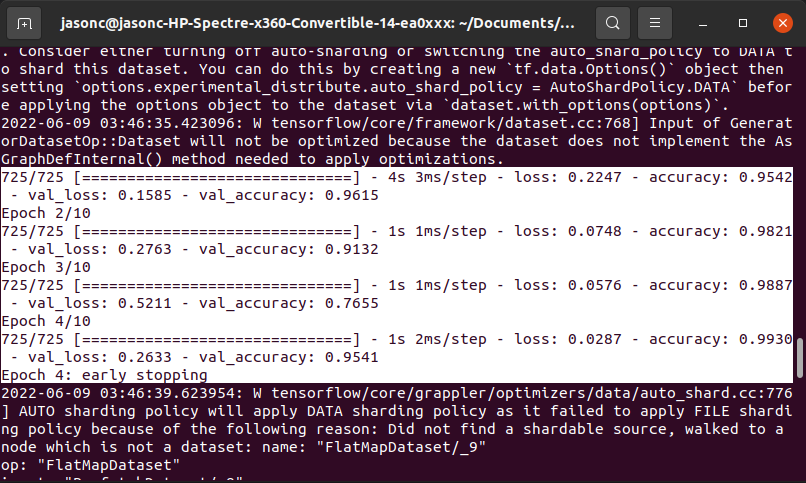

In [ ]:
# Screenshot when we were running the neural network.
Image("/content/drive/MyDrive/BIPN-162-Project/figure/Screenshot from 2022-06-09 03-48-32.png")

### Data Visualization

Three visualizations were generated within the process to verify we had run the code properly. Comparisons with paper are provided. As we could see, the figures reproduecd in the progress have high similarity with the ones from paper, suggesting we indeed successfully reproduce the results with original dataset. The figures we generated are distribution of activation of each cell type, encoding information, and signaling design. 

One thing to notice is that we use a different dataset to test the model and generate the figures since we could not find the orignal dataset. so the figures for distribution of activation of each cell type will be different. Besides that, other figures are highly similar to the original ones from the paper. 

In the distribution of activaation of each cell type, we generate a box plot to show the activation score of each cell type in the specific pathway. In the encoding visualization, we use a 2D TSNE to show the dimensional reductin result based on the learned representation of the data. The pathway-based nerual netwrok was trained and then used to compute the encoding of the sets. In the 1-layer signaling design, the figure is ued to evaluate the supervised perfomance of the neural netwrok with classical ML metrics. Besides, cross validation performance was generated 

#### Distribution of activation of each cell type

Paper:

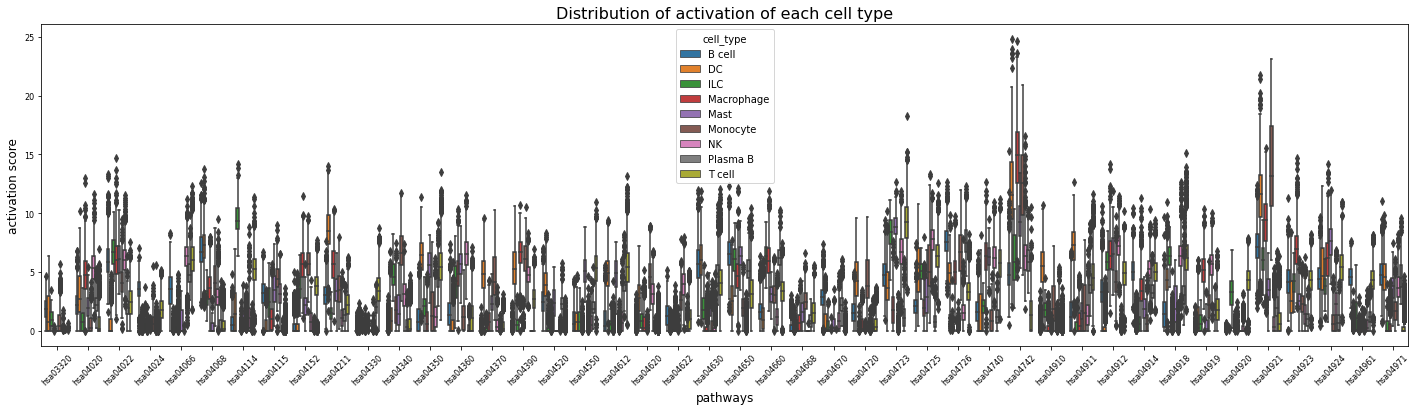

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/figure/network_performance.png", width=600, height=200)

Our Reproduction:

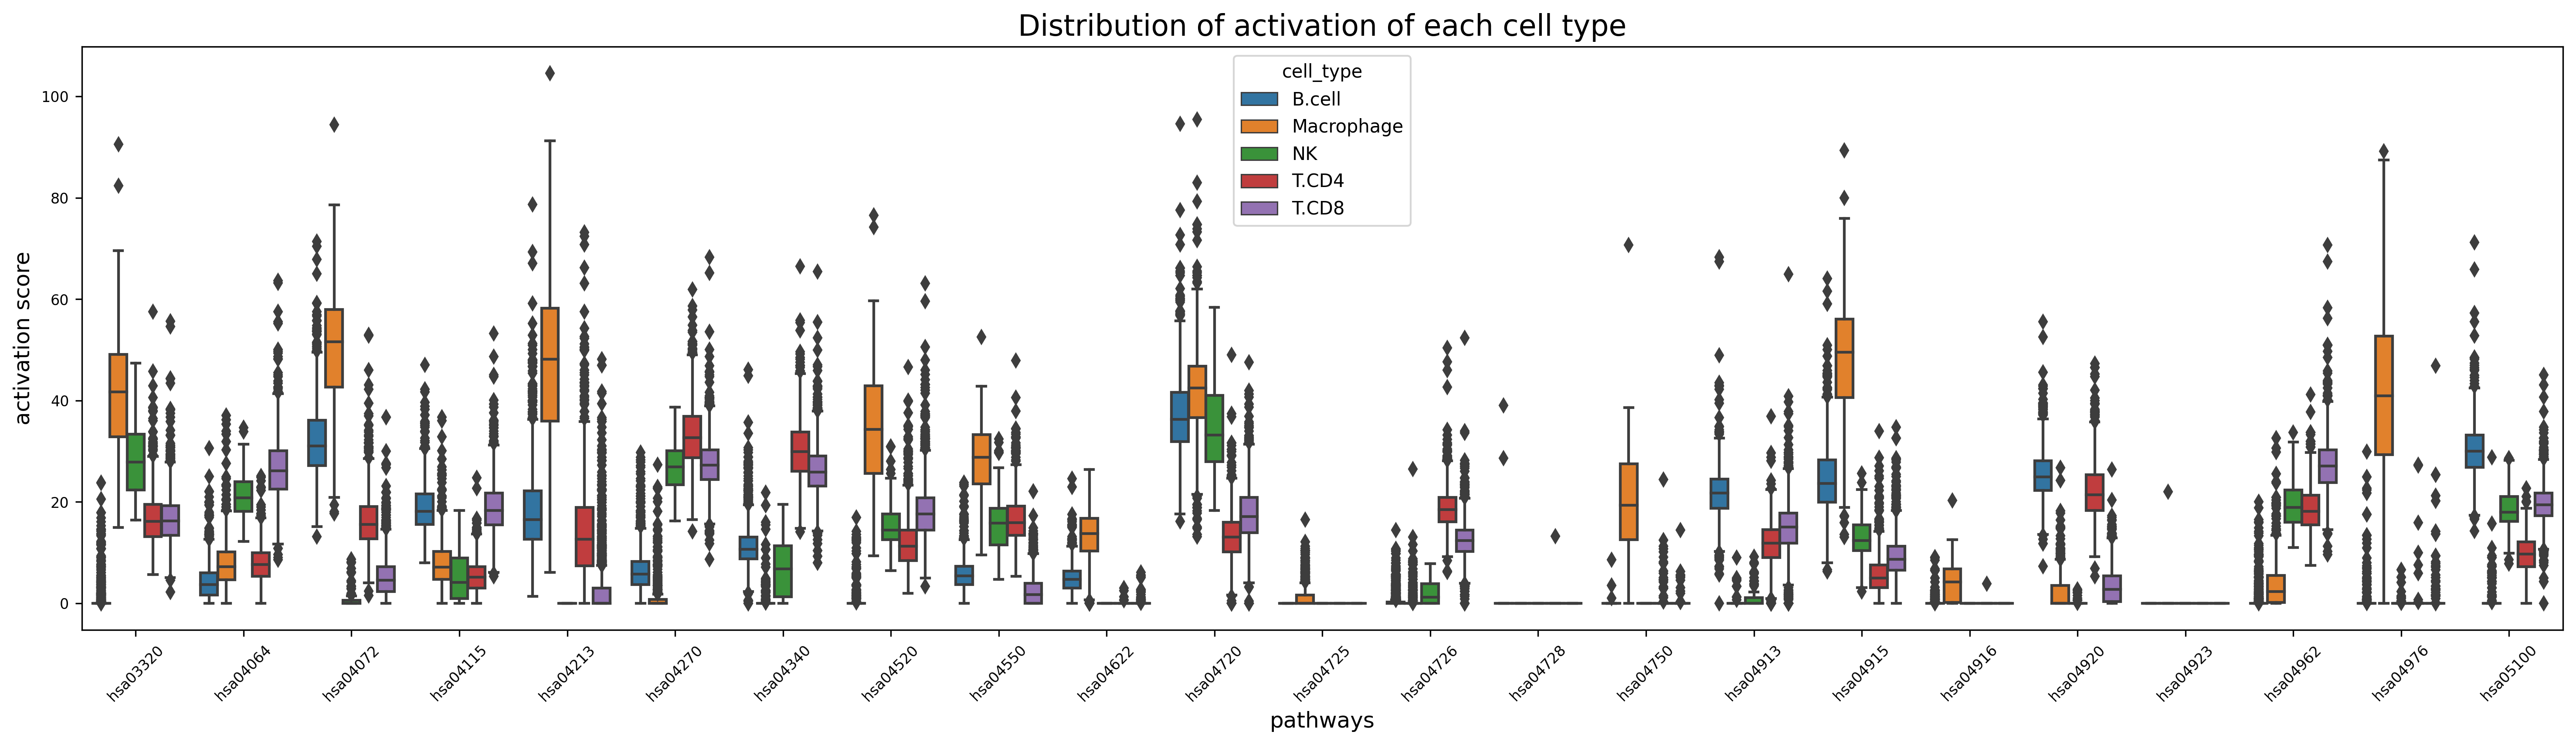

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/Reproduce/reports/activation/exper_melanoma/distribution_activities_fig3g.png", width=600, height=200)

These two graphs represents the distribution of activation scores in each signaling pathways for different cell types. The higher the activation score, the more active the pathway. We can from the graphs that in different cell types, signaling pathways vary greatly, which gives us a great opportunity to classify cell types.

#### Encoding information -1 layer design

Paper:

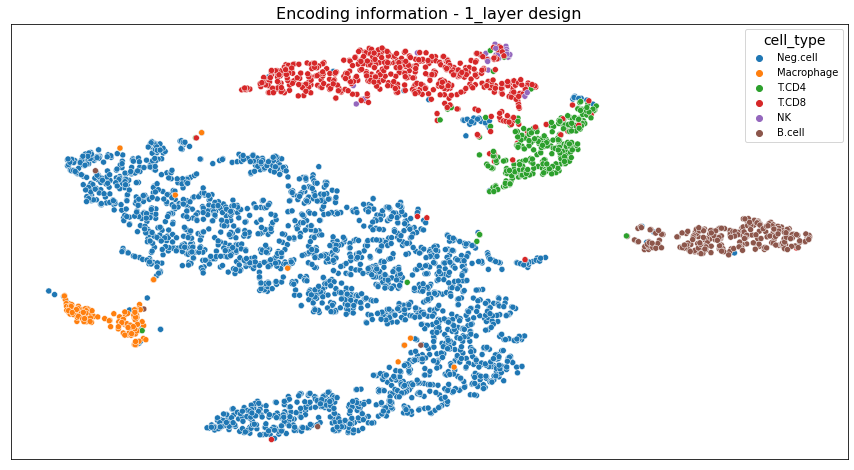

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/figure/ecoding information.png", width=500, height=375)

Our Reproduction:

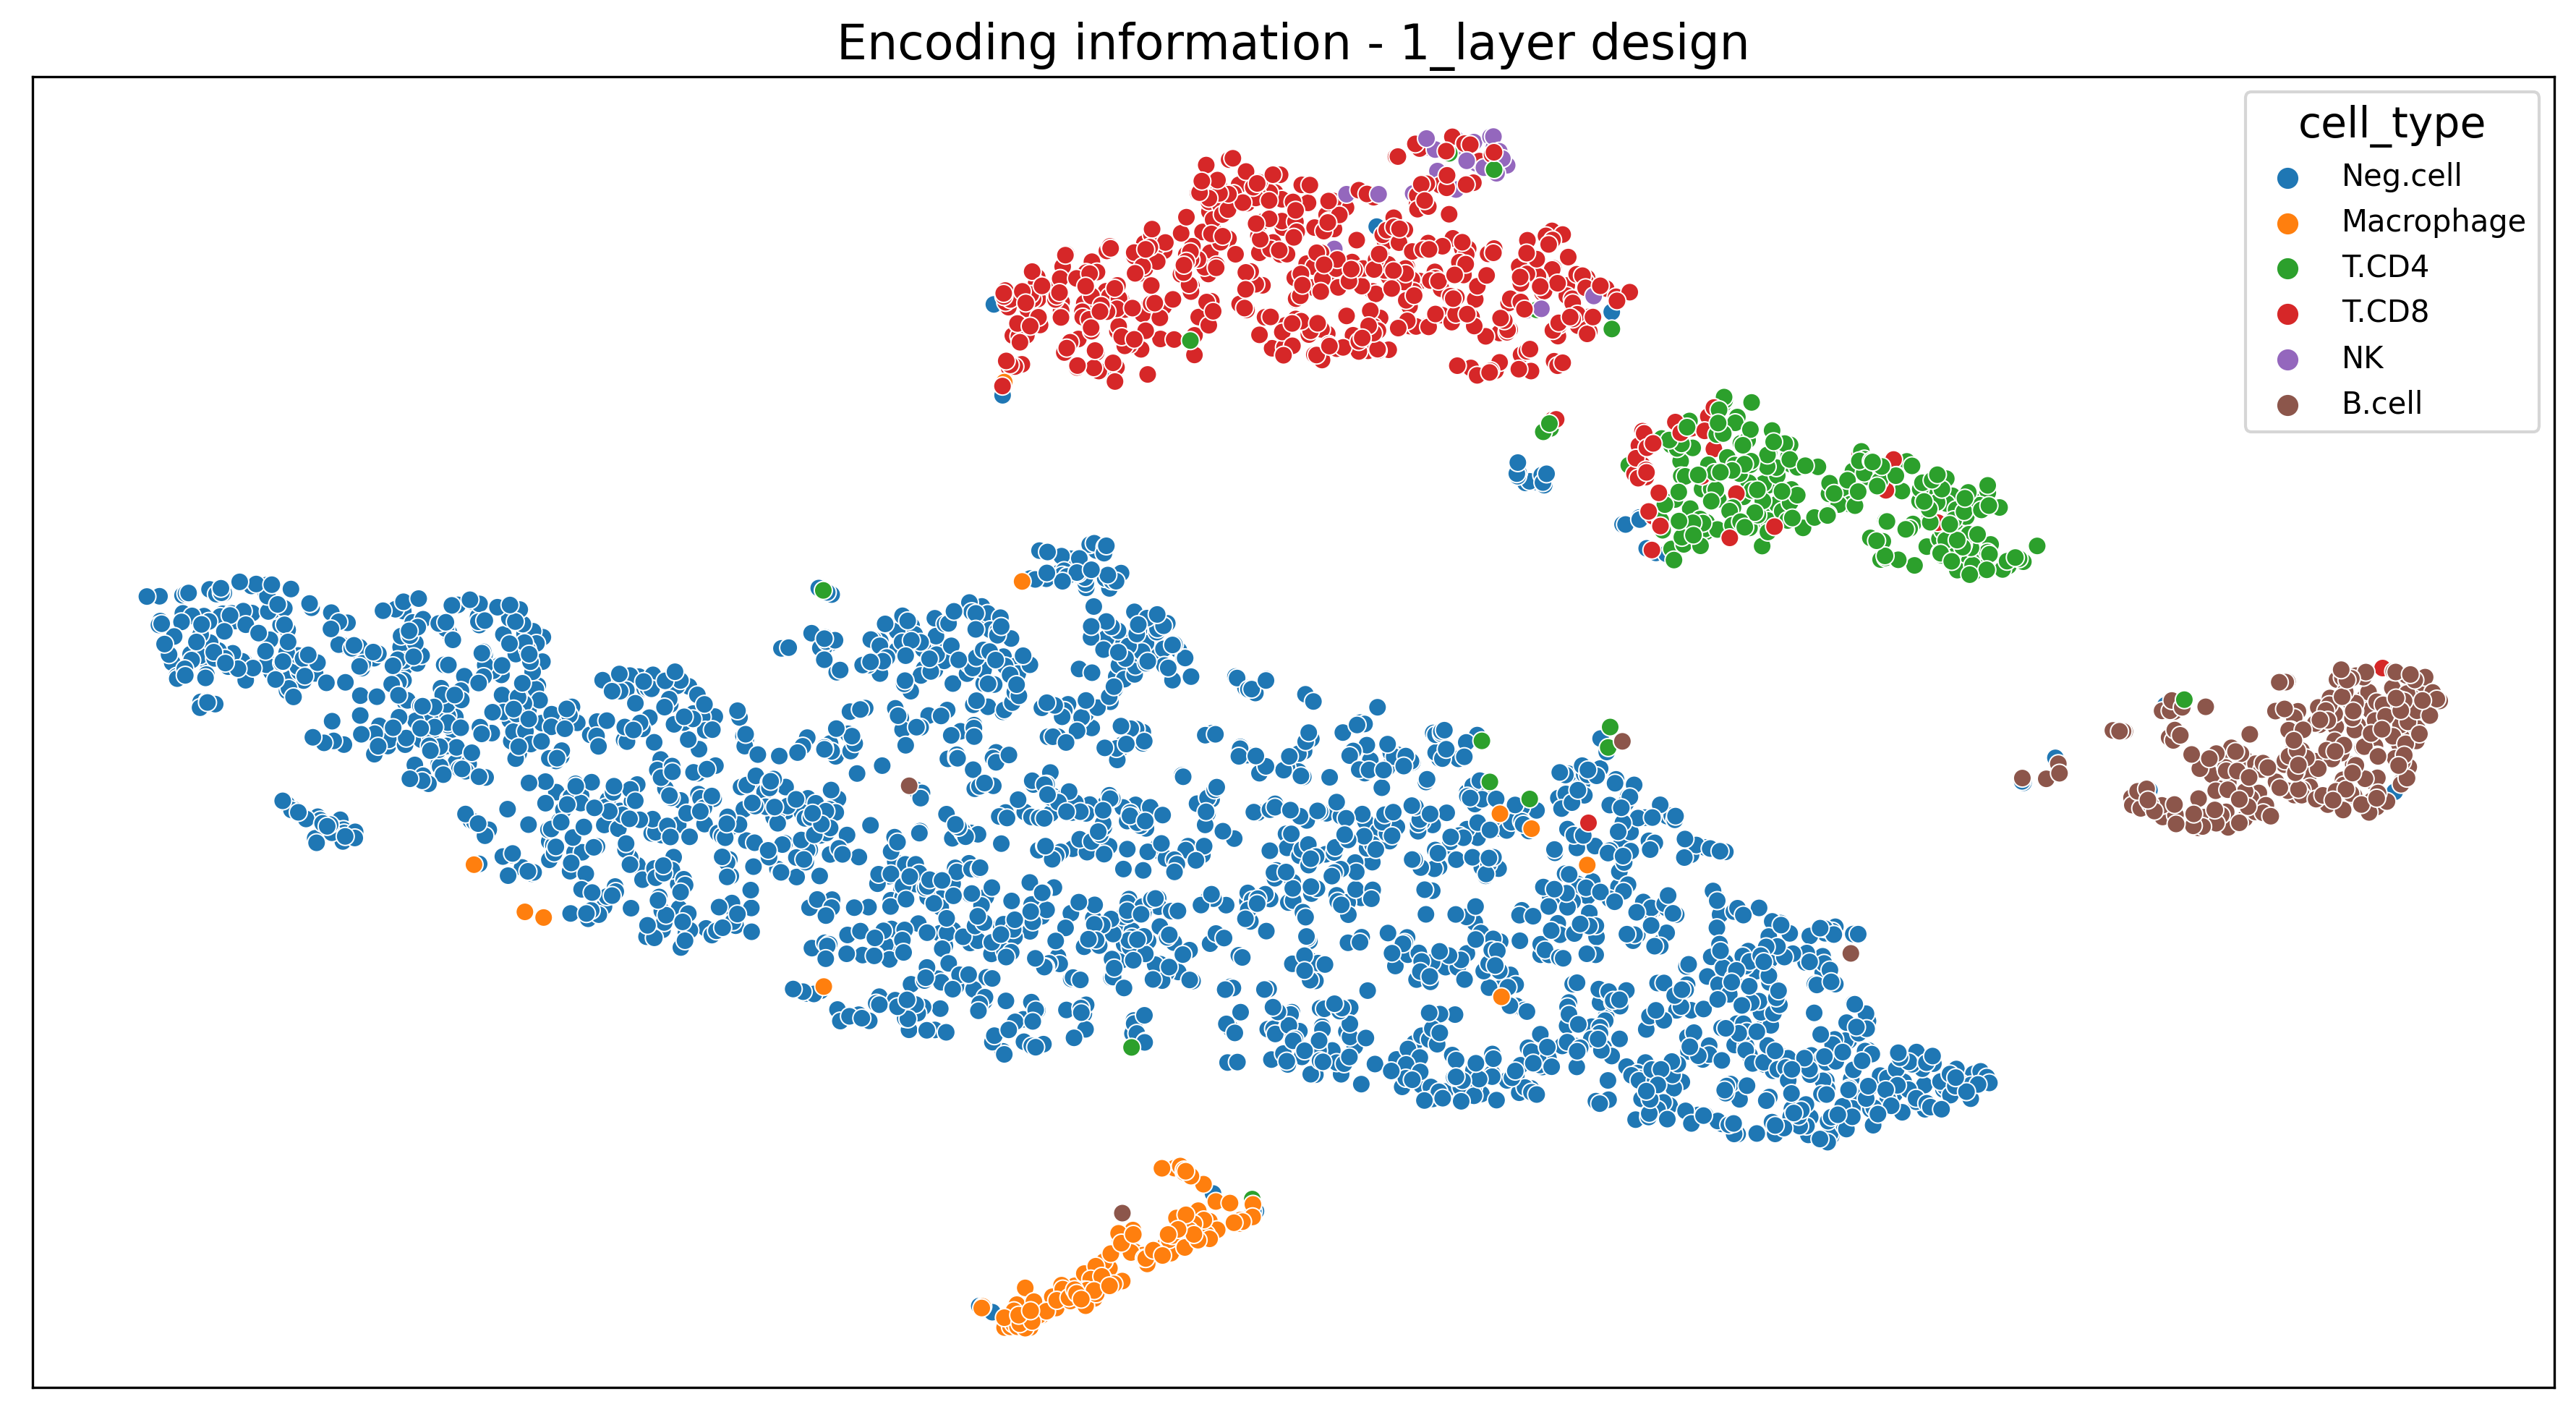

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/Reproduce/reports/encoding/exper_melanoma/mel_enc_query_1_layer.png", width=500, height=375)

These two graphs are 2D TSNE graphs, showing the structure of the dataset in a reduced dimension and the classification results. We can see that the graph from our reproduction and the graph from the paper are similar. They all have clear clafficication results (with clear boundaries) and only a few errors.

#### 1-layer signaling design

Paper:

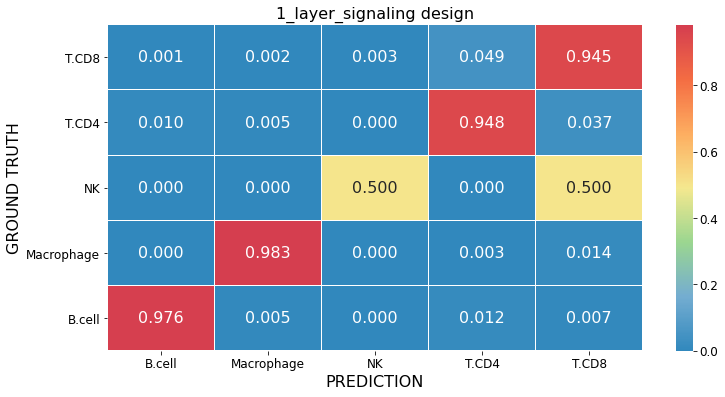

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/figure/signaling_1-layer.png", width=500, height=375)

Our reproduction:

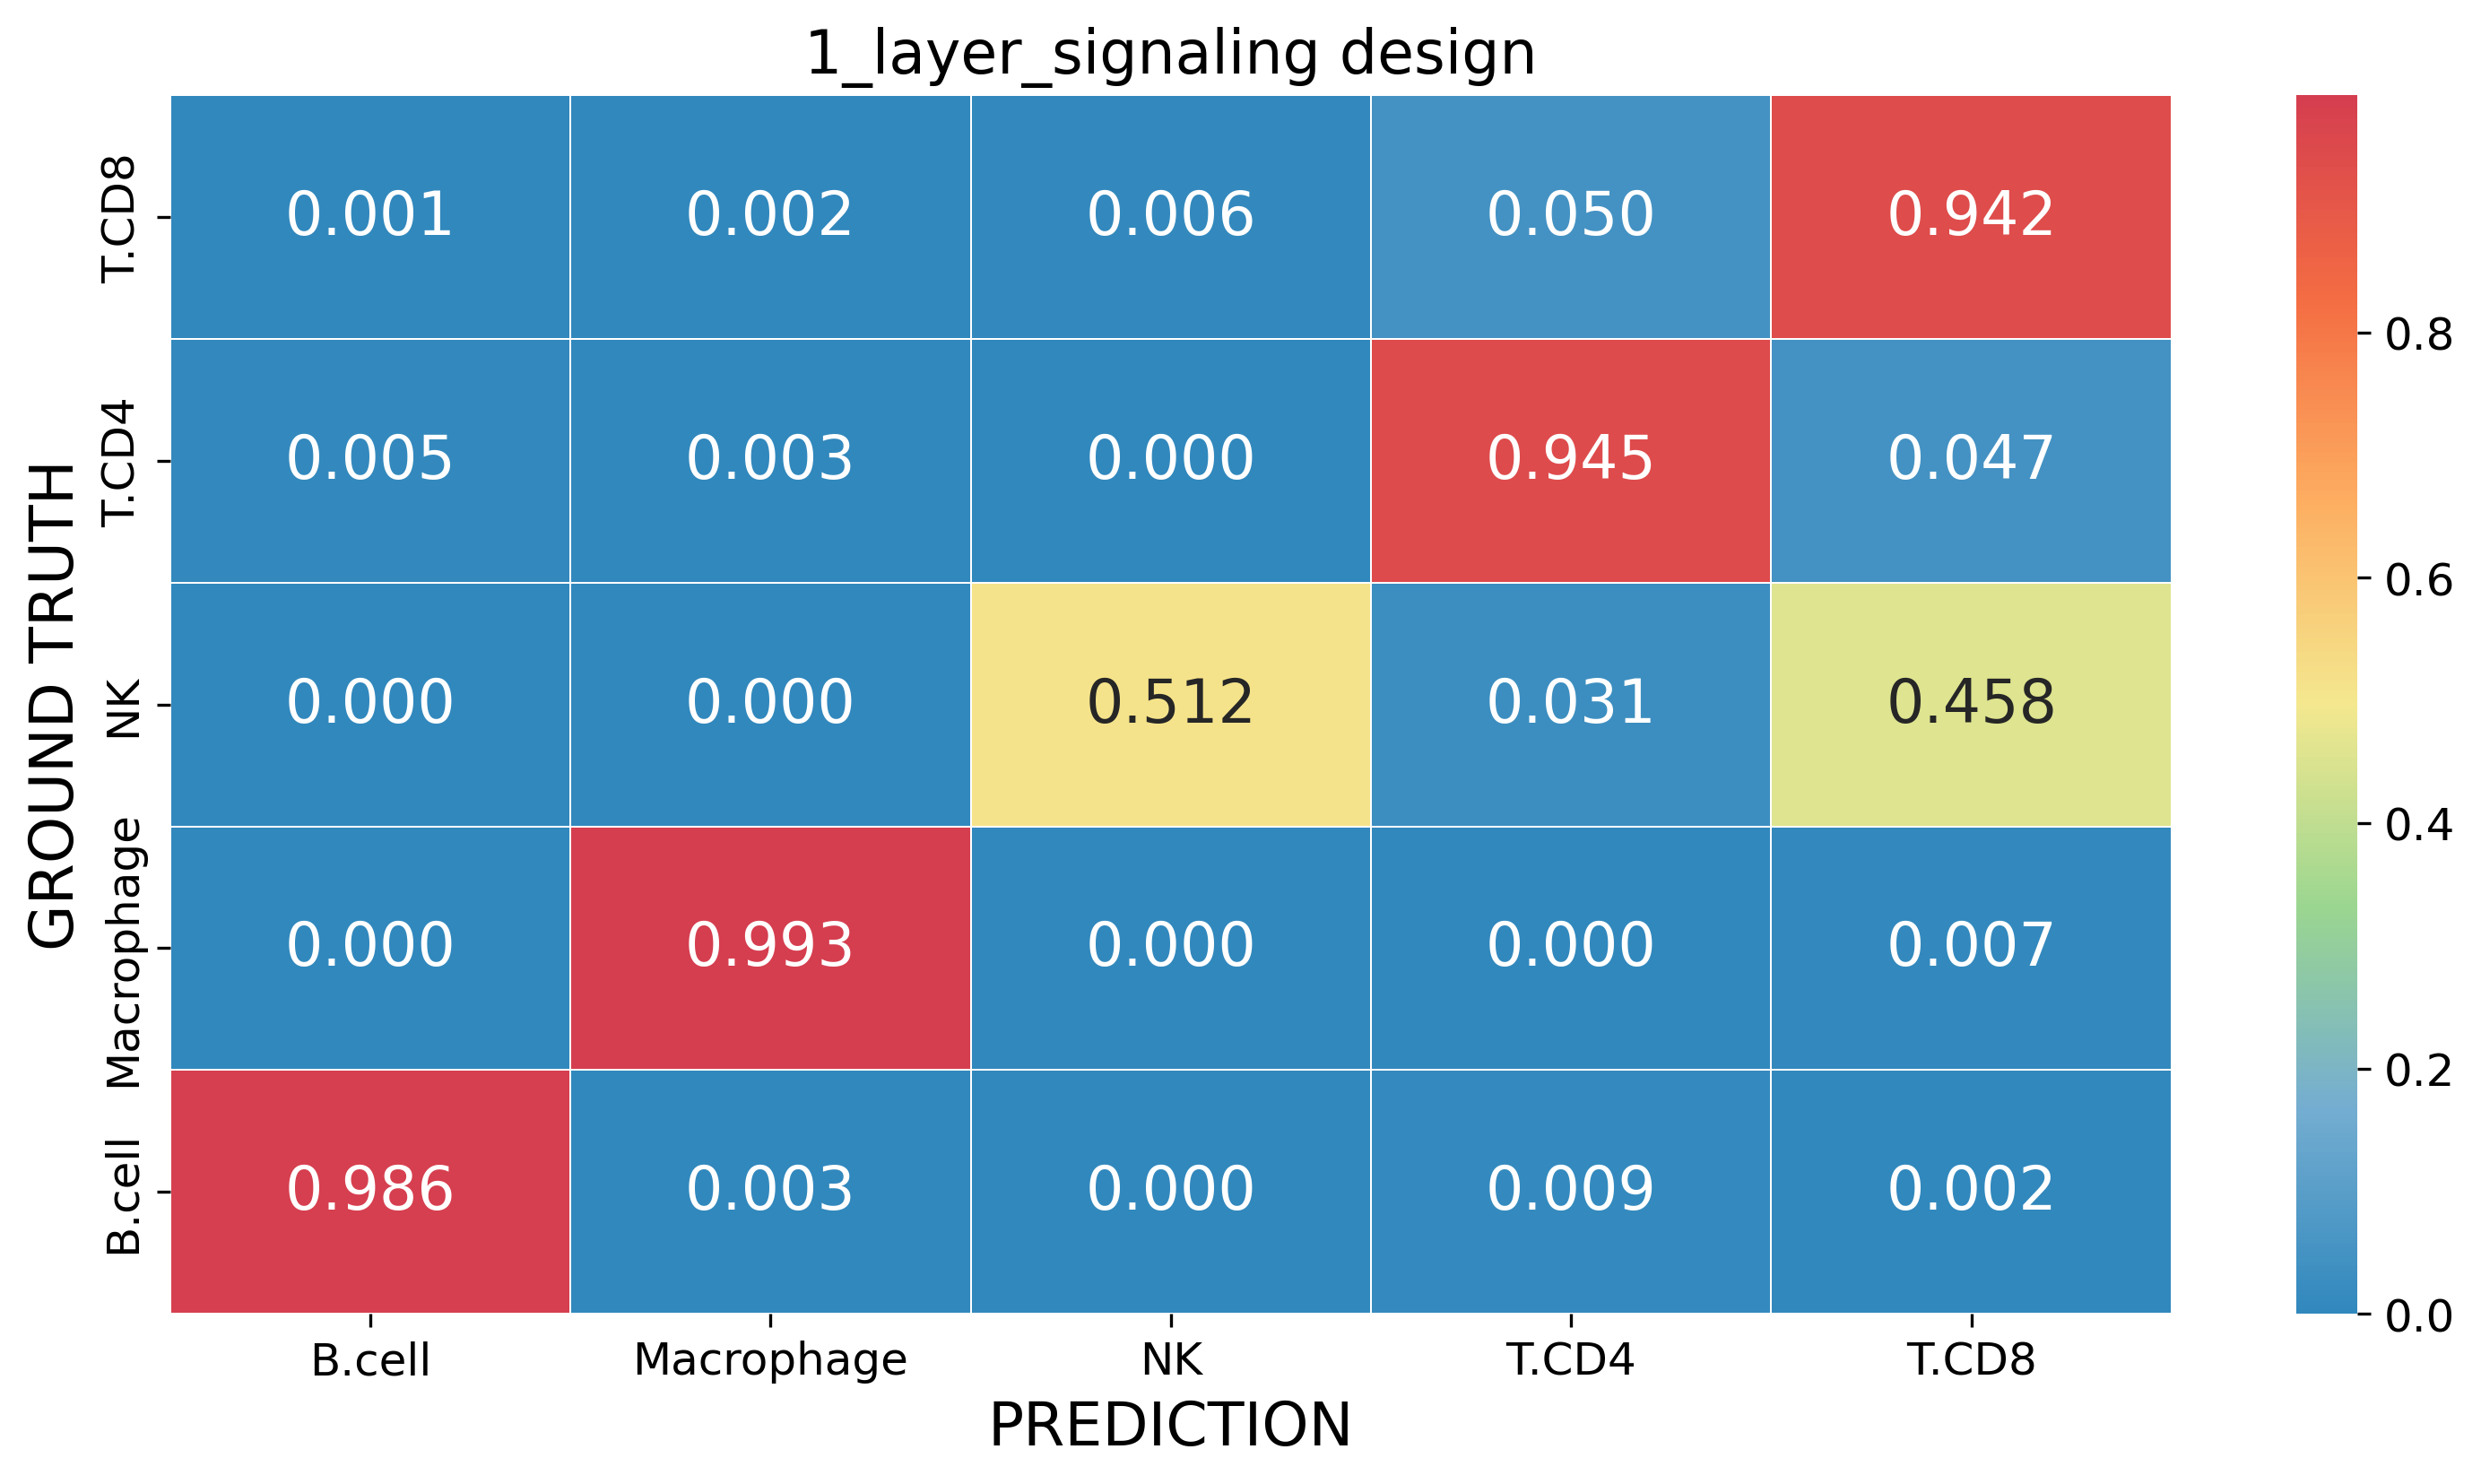

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/Reproduce/reports/evaluate/exper_melanoma/StratifiedKFold/3_cm_1_layer_signaling.png", width=500, height=375)

These two graphs are confusion matrices for the results. In the diagonal, the cell types are correctly classified. We can see from the graph that the neural network did an amazing job in classification. It has more than 94% accuracy for each cell types exept NK. Also, we can see that the two confusion matricecs are similar to each other (they have the same distributions).

#### Cross validation performance

Paper:

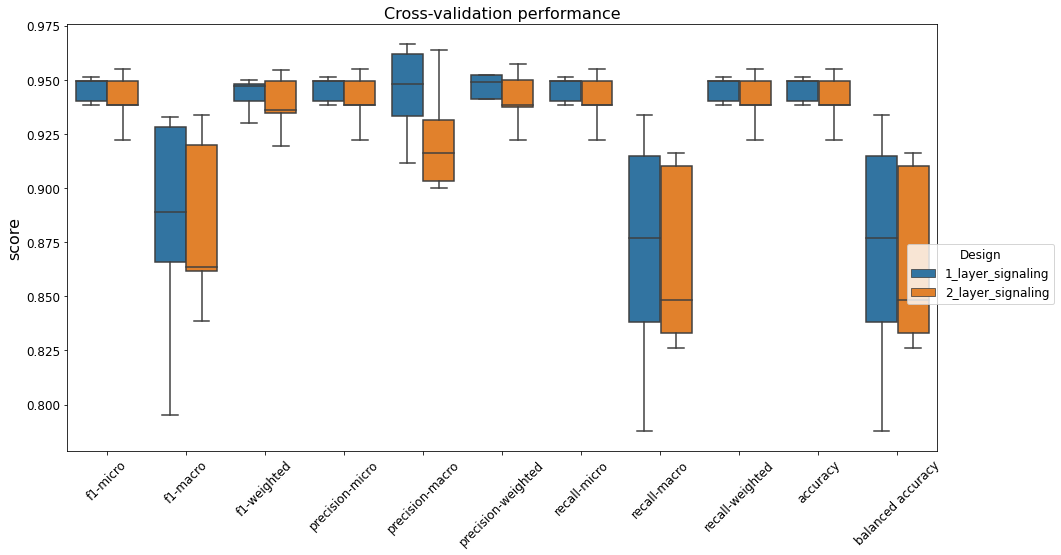

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/figure/cross validation.png", width=600, height=300)

Our Reproduction:

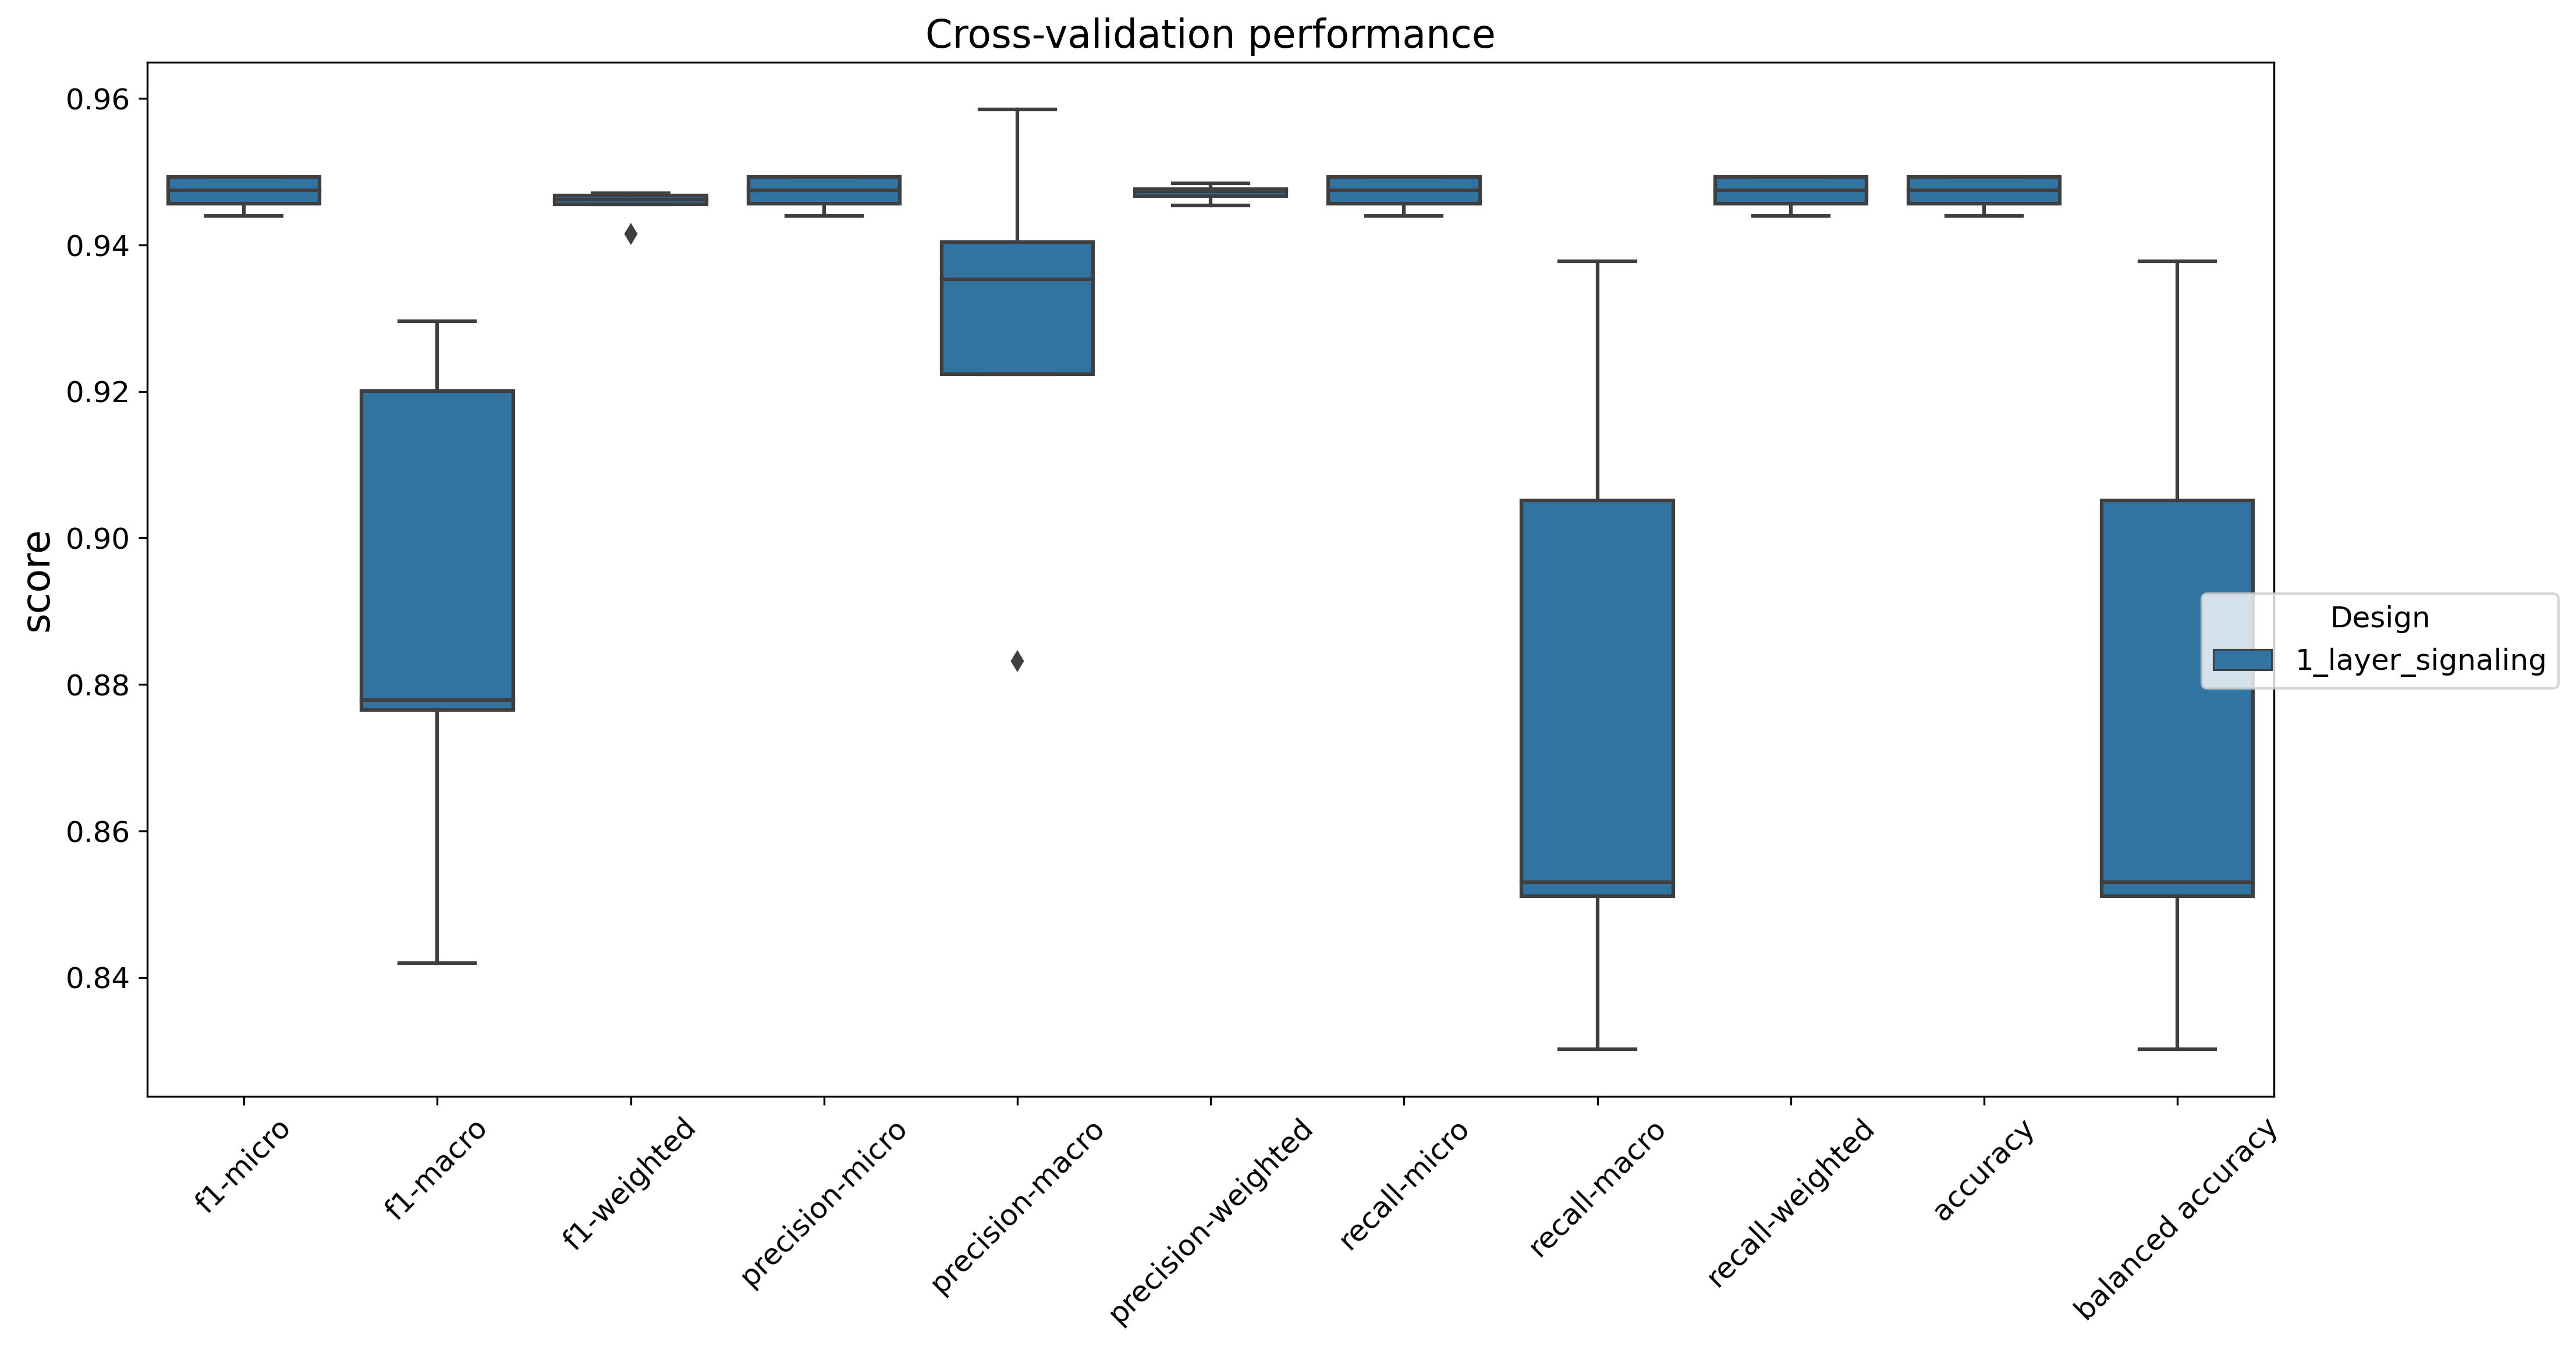

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/Reproduce/reports/evaluate/exper_melanoma/StratifiedKFold/1_metrics.png", width=600, height=300)

These two boxplots shows the metrics for our models. Because we only reproduced 1-layer-design, there will be only one group. We can see that the metrics have very similar results: high score in micro metrics and relatively low score in macro metrics and balanced accuracy. Comprehensively, the model did a great job because all the average scores are above 80%, which is relatively high.

# Additional Dataset Analysis and Result

### New Dataset

Our raw additional dataset comes from a project that collect RNA sequencing data of 10068 single cell samples from anterior lateral motor cortical area (ALM) in mice. More specifically, the cell samples come from 8 week-old male and female mice’ brain regions dissections.  Classe of the cell samples includes (Glutamatergic, Gabaergic, Endothelial, Non-neuronal, No class, Low quality), and the RNAseq results of sample cells are processed by STAR algorithm to match with corresponding exons based on GRCm38.p3 mouse genome. 
The raw additional dataset can be downloaded from Allen Brain Map, and also attached in our shared google drive. https://portal.brain-map.org/atlases-and-data/rnaseq/mouse-v1-and-alm-smart-seq

In [ ]:
# Read original dataset.
data = pd.read_csv('/content/drive/MyDrive/BIPN-162-Project/Dataset/mouse_ALM_gene_expression_matrices_2018-06-14/mouse_ALM_2018-06-14_exon-matrix.csv')
# Read labels.
cells = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/BIPN-162-Project/Dataset/mouse_ALM_gene_expression_matrices_2018-06-14/mouse_ALM_2018-06-14_samples-columns.csv', encoding='ISO 8859-1' ))["class"]
cells = pd.DataFrame(cells)
# Print original dataset.
data

Unnamed: 0  F1S4_161216_001_A01  F1S4_180124_314_A01  \
0           71661                    0                    0   
1           76253                    0                    0   
2           58520                  121                   79   
3           66050                  171                   45   
4       100125929                    0                    0   
...           ...                  ...                  ...   
45763   100861496                    0                    0   
45764   100861497                    0                    0   
45765   100861498                    0                    0   
45766   100861500                    0                    0   
45767   100861503                    0                    0   

       F1S4_180124_315_A01  F1S4_180124_315_B01  F1S4_180124_315_C01  \
0                        0                    0                    0   
1                        0                    0                    0   
2                      233                  138                   53   
3                      267                  170                   86   
4                        0                    0                    3   
...                    ...                  ...                  ...   
45763                    0                    0                    0   
45764                    0                    0                    0   
45765                    0                    0                    0   
45766                    0                    0                    0   
45767                    0                    0                    0   

       F1S4_180124_315_D01  F1S4_180124_315_E01  F1S4_180124_315_F01  \
0                        0                    0                    0   
1                        0                    0                    0   
2                      112                  106                   73   
3                      129                  124                   65   
4                        0                    0                    0   
...                    ...                  ...                  ...   
45763                    0                    0                    0   
45764                    0                    0                    0   
45765                    0                    0                    0   
45766                    0                    0                    0   
45767                    0                    0                    0   

       F1S4_180124_315_G01  ...  FJS4_170511_011_G01  FJS4_170511_011_H01  \
0                        0  ...                    0                    0   
1                        0  ...                   18                    0   
2                      191  ...                   64                  173   
3                       91  ...                   77                   98   
4                        7  ...                    0                   10   
...                    ...  ...                  ...                  ...   
45763                    0  ...                    0                    0   
45764                    0  ...                    0                    0   
45765                    0  ...                    0                    0   
45766                    0  ...                    0                    0   
45767                    0  ...                    0                    0   

       FJS4_170511_012_A01  FJS4_170511_012_B01  FJS4_170511_012_C01  \
0                        0                    0                    0   
1                        0                    0                    0   
2                      295                  185                  252   
3                      219                  475                  166   
4                        0                    0                    0   
...                    ...                  ...                  ...   
45763                    0                    0                    0   
45764              

### New Dataset Analysis and Result

Since DNN architecture built by the paper is designed to process RNAseq counts of different genes across single cell samples, given corresponding signaling pathway layer, it is appropriate to process our additional mice dataset. In this case, we proposed that DNN integrated with the mouse signaling pathway(bio_layer_mmu) as the first hidden layer should effectively perform clustering analysis for different cell types based on their genes and RNAseq counts, and top signaling pathways used for clustering analysis should be consistent biological knowledge in scientific literatures.

With the pathway analysis of top weighted signaling pathways record about how the cells regulate their activities. We propose that the improved pathway-oriented DNN can help us reveal the signaling pathways of different cells in mouse ALM, which is crucial for neuroscience study because it potentially helps us to understand cellular activity regulations, thus providing different perspectives regarding the cellular mechanisms behind the diseases. With this classification, we hope the model could provide a better biological explanation of data generated by cells.


### New Dataset Preprocessing

The raw additional data set that incorporates RNAseq aggregated counts for 3702 mouse genes across 10068 cell samples are stored in .csv format. Given the computing power and RAM constraints in our computer, we decided to trim off RNAseq expression of genes that are not recognized by mouse signaling pathways exported from Hipathia, so 3702 mouse gene with corresponding sequence across 10068 cell samples is further preprocessed. 

Rather than the .rds format of the original melanoma dataset, we transposed the dataset, processed the index column of the dataframe, and integrated labels into the dataset to match each cell sample with corresponding cell types. Meanwhile, since the original melanoma dataset records RNA-seq counts by gene symbol, we also replace entrez gene id in our additional dataset to corresponding gene symbols. 

Given the processing procedure in 1.0-pg-converting-datasets-into-pck.ipynb Data with Magic implemented
 section, we successfully convert our preprocessed dataset into .pck format. And following the same procedure in 2.0-pg-preprocessing-dataset.py.preprocessing-dataset.py as our original dataset, we process the dataset by log1p  sample-wise normalization and then gene-wise normalization.


Specifically, we first combined the data with corresponding labels, as they are required for the neural network to process. Second, we converted gene id to gene symbol, in order to make the neural network successfully recognize the genes. Third, we filtered irrelevant genes, as they do not occur in the gene list in the pathway matrix. After doing the preprocessing, we exported the dataset to .pck format.

In [ ]:
# Rename column and set index for additional dataset.
data = data.rename(columns = {"Unnamed: 0": "sample"}).set_index("sample")
# Reset index of additional dataset.
data = data.T.reset_index()
# Merge additional dataset and labels.
dataset = pd.concat([data,cells], axis = 1)
# Rename, reset index.
dataset = dataset.rename(columns = {"class": "label"})
dataset = dataset.rename(columns = {"index":"sample"})
dataset = dataset.set_index("sample")
ALM = dataset
# Read gene list and corresponding gene symbols.
genes = pd.read_csv("/content/drive/MyDrive/BIPN-162-Project/Reproduce/data/processed/mmu/hipathia/entrez_and_symbol.csv")
# The following code is to replace gene entrez id with gene symbols.
path = []
ids = []
id = []
genes
for x in genes['gene_id']:
  for y in list(ALM.columns):
    if x == y:
      path.append(x)
for x in path:
  ids.append(path.index(x))
for x in ids:
  id.append(genes['symbol'][x])
ALM_processed = ALM[path]
# Select genes that are in the biological pathway matrix.
ALM_processed.columns = id
ALM_processed = pd.concat([ALM_processed, ALM['label']], axis = 1)
# Print processed additional dataset.
ALM_processed

Olfr55  Olfr239  Isg15  Gm14548  Sirpb1c  Gm2002  Gm2023  \
sample                                                                          
F1S4_161216_001_A01       0        0      0        0        0       0       0   
F1S4_180124_314_A01       0        0      4        0        0       0       0   
F1S4_180124_315_A01       0        0      0        0        0       0       0   
F1S4_180124_315_B01       0        0      0        0        0       0       0   
F1S4_180124_315_C01       0        0      0        0        0       0       0   
...                     ...      ...    ...      ...      ...     ...     ...   
FJS4_170511_012_D01       0        0      0        0        0       0       0   
FJS4_170511_012_E01       0        0      0        0        0       0       0   
FJS4_170511_012_F01       0        0      0        0        0       0       0   
FJS4_170511_012_G01       0        0      0        0        0       0       0   
FJS4_170511_012_H01       0        0      0        0        0       0       0   

                     Gm2436  Gm2446  Gm13306  ...  Tnxb  Tlr9  Cacng7  Cacng8  \
sample                                        ...                               
F1S4_161216_001_A01       1       0        0  ...    22     0       0     123   
F1S4_180124_314_A01       0       0        0  ...     0     0       0       6   
F1S4_180124_315_A01       0       0        0  ...     0     0       0      70   
F1S4_180124_315_B01       0       0        0  ...     0     0       0      68   
F1S4_180124_315_C01       0       0        0  ...     0     0       0     108   
...                     ...     ...      ...  ...   ...   ...     ...     ...   
FJS4_170511_012_D01       3       0        0  ...    45     0       0     102   
FJS4_170511_012_E01       3       0        0  ...     0     0       0      94   
FJS4_170511_012_F01       7       0        0  ...    44     0       0      30   
FJS4_170511_012_G01       3       0        0  ...     0     0       0     121   
FJS4_170511_012_H01       8       0        0  ...     3     0       0      59   

                     Lamtor2  Il23a  Trem2  Pik3ap1  Wasf1          label  
sample                                                                     
F1S4_161216_001_A01      271      6      0        0      0  Glutamatergic  
F1S4_180124_314_A01      107      4      0        0      0  Glutamatergic  
F1S4_180124_315_A01        3      0      0        0      0      GABAergic  
F1S4_180124_315_B01       10      5      0        0      0      GABAergic  
F1S4_180124_315_C01        6      3      0        0      0      GABAergic  
...                      ...    ...    ...      ...    ...            ...  
FJS4_170511_012_D01       54     12      0        0      0  Glutamatergic  
FJS4_170511_012_E01       91     33      0        0      0  Glutamatergic  
FJS4_170511_012_F01       73    121      0        0      0  Glutamatergic  
FJS4_170511_012_G01        0    190      0        0      0  Glutamatergic  
FJS4_170511_012_H01      114     72      0        0      0  Glutamatergic  

[10068 rows x 3703 columns]

In [ ]:
# Print cell types and corresponding counts.
ALM_processed.groupby('label').size()

label
Endothelial       155
GABAergic        4409
Glutamatergic    4539
Low Quality        99
No Class          396
Non-Neuronal      470
dtype: int64

### Visualization and Validation

We found that our code ran successfully and as we expected. The reason we think the code ran as we expected is that after we finished preprocessing of the dataset, we were able to perform the remaining procedures successfully and smoothly. In other words, after data preprocessing, all the remainig steps converges, including data normalization, neural network training/testing, and visulization. The other thing that suggests that our code run as we expected is that the exported files have the same format and similar contents to the paper's original data and exported files. Also, after visualization and seeing the metrics, we also found that the model has outstanding performance and similar results to the original paper's, which also indicates that our code runs correctly.

In [ ]:
# Load  biological pathway matrix
path_mouse = pd.read_csv("/content/drive/MyDrive/BIPN-162-Project/Additional Data Analysis/data/processed/bio_layer_mmu.txt", sep = ",")
path_mouse

symbol  mmu03320  mmu04010  mmu04012  mmu04014  mmu04015  mmu04020  \
0      olfr55       0.0       0.0       0.0       0.0       0.0       0.0   
1     olfr239       0.0       0.0       0.0       0.0       0.0       0.0   
2       isg15       0.0       0.0       0.0       0.0       0.0       0.0   
3     gm14548       0.0       0.0       0.0       0.0       0.0       0.0   
4     sirpb1c       0.0       0.0       0.0       0.0       0.0       0.0   
...       ...       ...       ...       ...       ...       ...       ...   
3732   ssx2ip       0.0       0.0       0.0       0.0       0.0       0.0   
3733    magi3       0.0       0.0       0.0       0.0       1.0       0.0   
3734      fgg       0.0       0.0       0.0       0.0       0.0       0.0   
3735   clca4a       0.0       0.0       0.0       0.0       0.0       0.0   
3736   clca4b       0.0       0.0       0.0       0.0       0.0       0.0   

      mmu04022  mmu04024  mmu04062  ...  mmu04925  mmu04960  mmu04961  \
0          0.0       0.0       0.0  ...       0.0       0.0       0.0   
1          0.0       0.0       0.0  ...       0.0       0.0       0.0   
2          0.0       0.0       0.0  ...       0.0       0.0       0.0   
3          0.0       0.0       0.0  ...       0.0       0.0       0.0   
4          0.0       0.0       0.0  ...       0.0       0.0       0.0   
...        ...       ...       ...  ...       ...       ...       ...   
3732       0.0       0.0       0.0  ...       0.0       0.0       0.0   
3733       0.0       0.0       0.0  ...       0.0       0.0       0.0   
3734       0.0       0.0       0.0  ...       0.0       0.0       0.0   
3735       0.0       0.0       0.0  ...       0.0       0.0       0.0   
3736       0.0       0.0       0.0  ...       0.0       0.0       0.0   

      mmu04962  mmu04970  mmu04971  mmu04972  mmu04973  mmu04976  mmu05100  
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
...        ...       ...       ...       ...       ...       ...       ...  
3732       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3733       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3734       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3735       0.0       0.0       0.0       1.0       0.0       0.0       0.0  
3736       0.0       0.0       0.0       1.0       0.0       0.0       0.0  

[3737 rows x 93 columns]

This the biological pathway matrix we generated. In this matrix, 0 means that the gene does not express in the corresponding signaling pathway, while 1 means that the gene expresses in the corresponding pathway. This matrix is similar to the one for human, and the only difference is that the pathways are for mice.

#### Pathway Analysis Results

We perform the analysis on top 10 signaling pathways for Glutamatergic and GABAergic. Non-neuronal, No-class, Low quality, and epithelial cells are left out as they are not the focus in neurobiology context. The top pathways used for clustering different types of cells should be consistent with the function of different cells. Information of different pathways are provided by https://www.genome.jp/kegg/kegg2.html

For instance, in Glutamatergic cells, mmu04923 Regulation of lipolysis in adipocytes pathway involves Gs-coupled-adrenergic receptors and protein kinase A, which are consistent with the metabotropic process mediated by mGlu receptors. mmu04912 GnRH signaling pathway involves Gq proteins and IP3, which are also consistent with metabotropic process of mGlu receptors. 

Similarly, mmu04923 and mmu04912 are also top pathways for GABAergic cells, which can be explained by the totally reverse metabotropic process in GABAb receptors. The GABAb receptor activation can initiates Gi process which results in  decrease in PKA and IP3.

Overall, by analyzing top 10 pathways produced by DNN, we can corresponds them to the real biological knowledge that classifies different neuronal cells.


In [ ]:
# Load top 10 signaling pathways for each type of cells
top_10_pathways_mouse = pd.read_csv("/content/drive/MyDrive/BIPN-162-Project/Additional Data Analysis/reports/activation/exper_melanoma/freq_pathways_top10_fig3g.csv")
top_10_pathways_mouse

pathways      cell_type
0   mmu04211  Glutamatergic
1   mmu04923  Glutamatergic
2   mmu04912  Glutamatergic
3   mmu04668  Glutamatergic
4   mmu04650  Glutamatergic
5   mmu04810  Glutamatergic
6   mmu04918  Glutamatergic
7   mmu04742  Glutamatergic
8   mmu04510  Glutamatergic
9   mmu04210  Glutamatergic
10  mmu04210      GABAergic
11  mmu04650      GABAergic
12  mmu04923      GABAergic
13  mmu04211      GABAergic
14  mmu04912      GABAergic
15  mmu04918      GABAergic
16  mmu04810      GABAergic
17  mmu04916      GABAergic
18  mmu04668      GABAergic
19  mmu04620      GABAergic
20  mmu04810       No Class
21  mmu04650       No Class
22  mmu04620       No Class
23  mmu04916       No Class
24  mmu04918       No Class
25  mmu04210       No Class
26  mmu04923       No Class
27  mmu04510       No Class
28  mmu04211       No Class
29  mmu04912       No Class
30  mmu04650   Non-Neuronal
31  mmu04918   Non-Neuronal
32  mmu04810   Non-Neuronal
33  mmu04742   Non-Neuronal
34  mmu04020   Non-Neuronal
35  mmu04923   Non-Neuronal
36  mmu04912   Non-Neuronal
37  mmu04211   Non-Neuronal
38  mmu04210   Non-Neuronal
39  mmu04668   Non-Neuronal
40  mmu04020    Low Quality
41  mmu04923    Low Quality
42  mmu04650    Low Quality
43  mmu04912    Low Quality
44  mmu04211    Low Quality
45  mmu04810    Low Quality
46  mmu04210    Low Quality
47  mmu04918    Low Quality
48  mmu04668    Low Quality
49  mmu04742    Low Quality
50  mmu04020    Endothelial
51  mmu04918    Endothelial
52  mmu04620    Endothelial
53  mmu04916    Endothelial
54  mmu04660    Endothelial
55  mmu04210    Endothelial
56  mmu04742    Endothelial
57  mmu04810    Endothelial
58  mmu04912    Endothelial
59  mmu04923    Endothelial

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/figure/Additional data clustering.png", width=500, height=375)

Output hidden; open in https://colab.research.google.com to view.

This figure is an 2D-TSNE plot, showing the structure of the dataset in a reduced dimension and the classification result. We can see that the neural network successfully separated the cells and the boundaries are clear. Although there are several misclassifications exist, the network still did an amazing job. The result is similar to the original dataset's result: clear boundaries, with a few misclassifications.

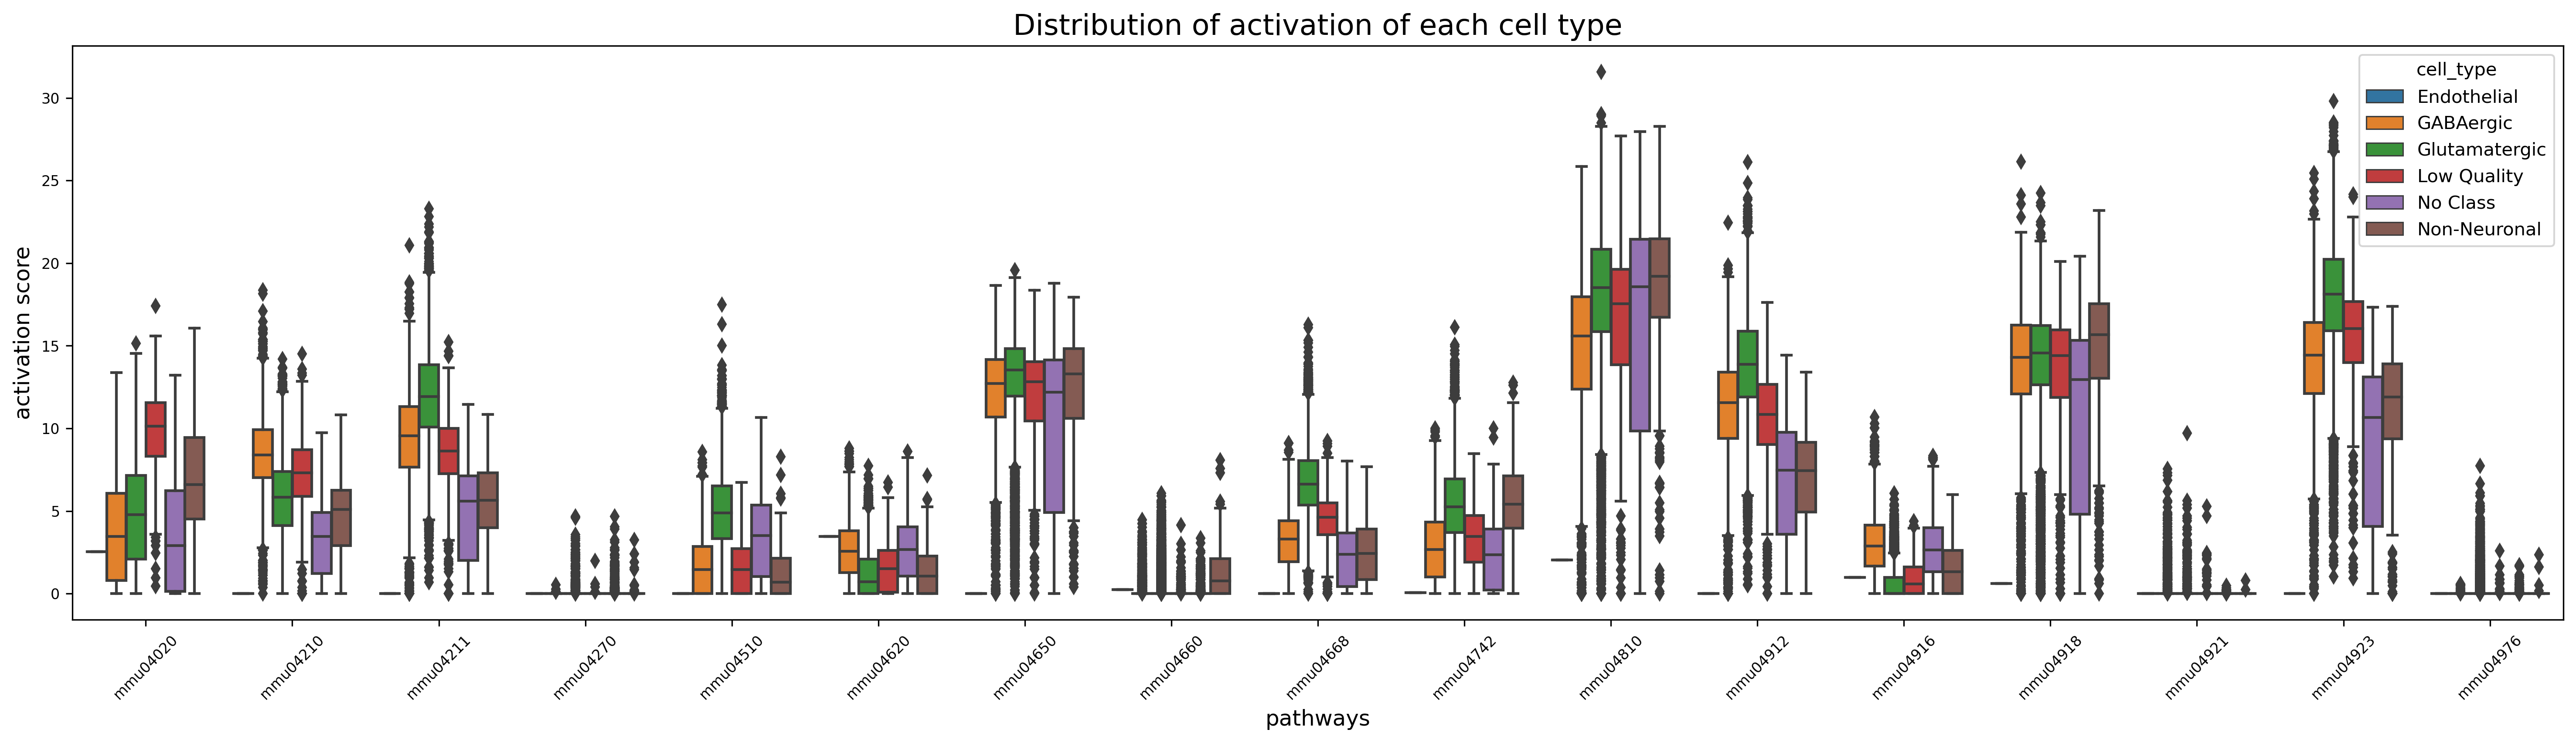

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/Additional Data Analysis/reports/activation/exper_melanoma/distribution_activities_fig3g.png", width=600, height=200)

We exported the activation of pathways for each cell type. The distribution of activation score looks different than the original dataset, but it is normal since the dataset is from another species (signaling pathways may be differnet).

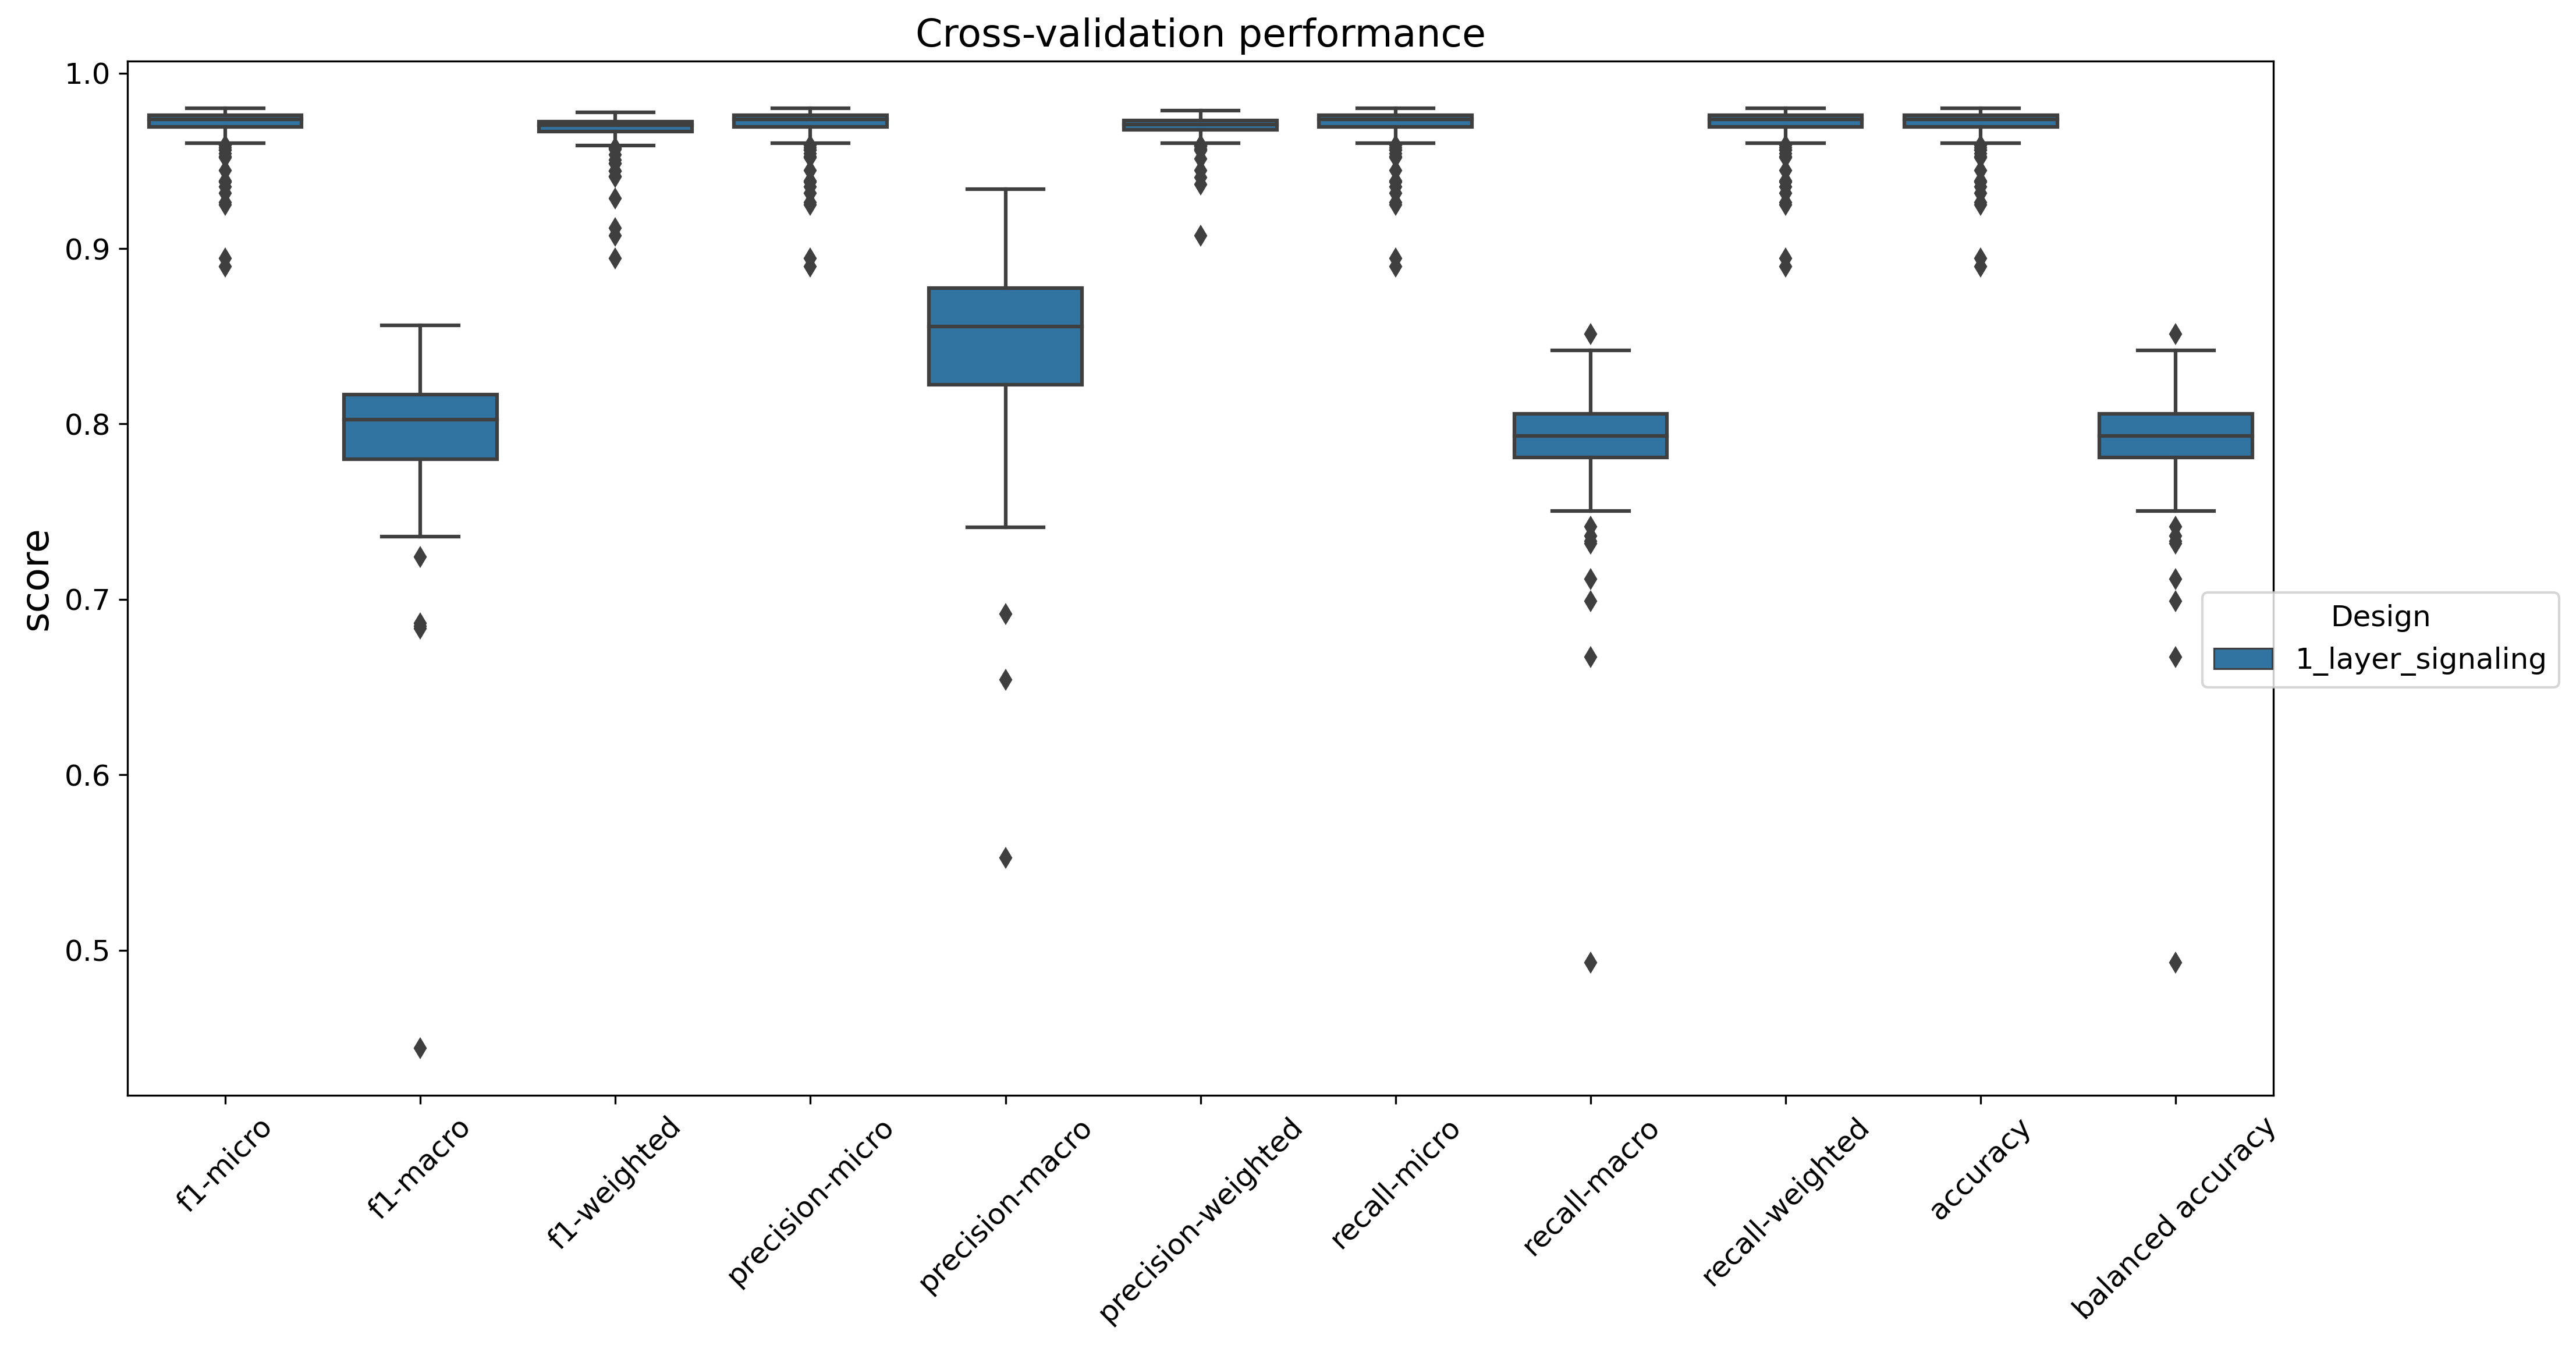

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/Additional Data Analysis/reports/evaluate/exper_melanoma/RepeatedStratifiedKFold/1_metrics.png", width=600, height=300)

This plot shows the metrics for our trained model. The result is very similar to the result in the original dataset: high score in micro metrics and relatively low score in macro metrics and balanced accuracy. 

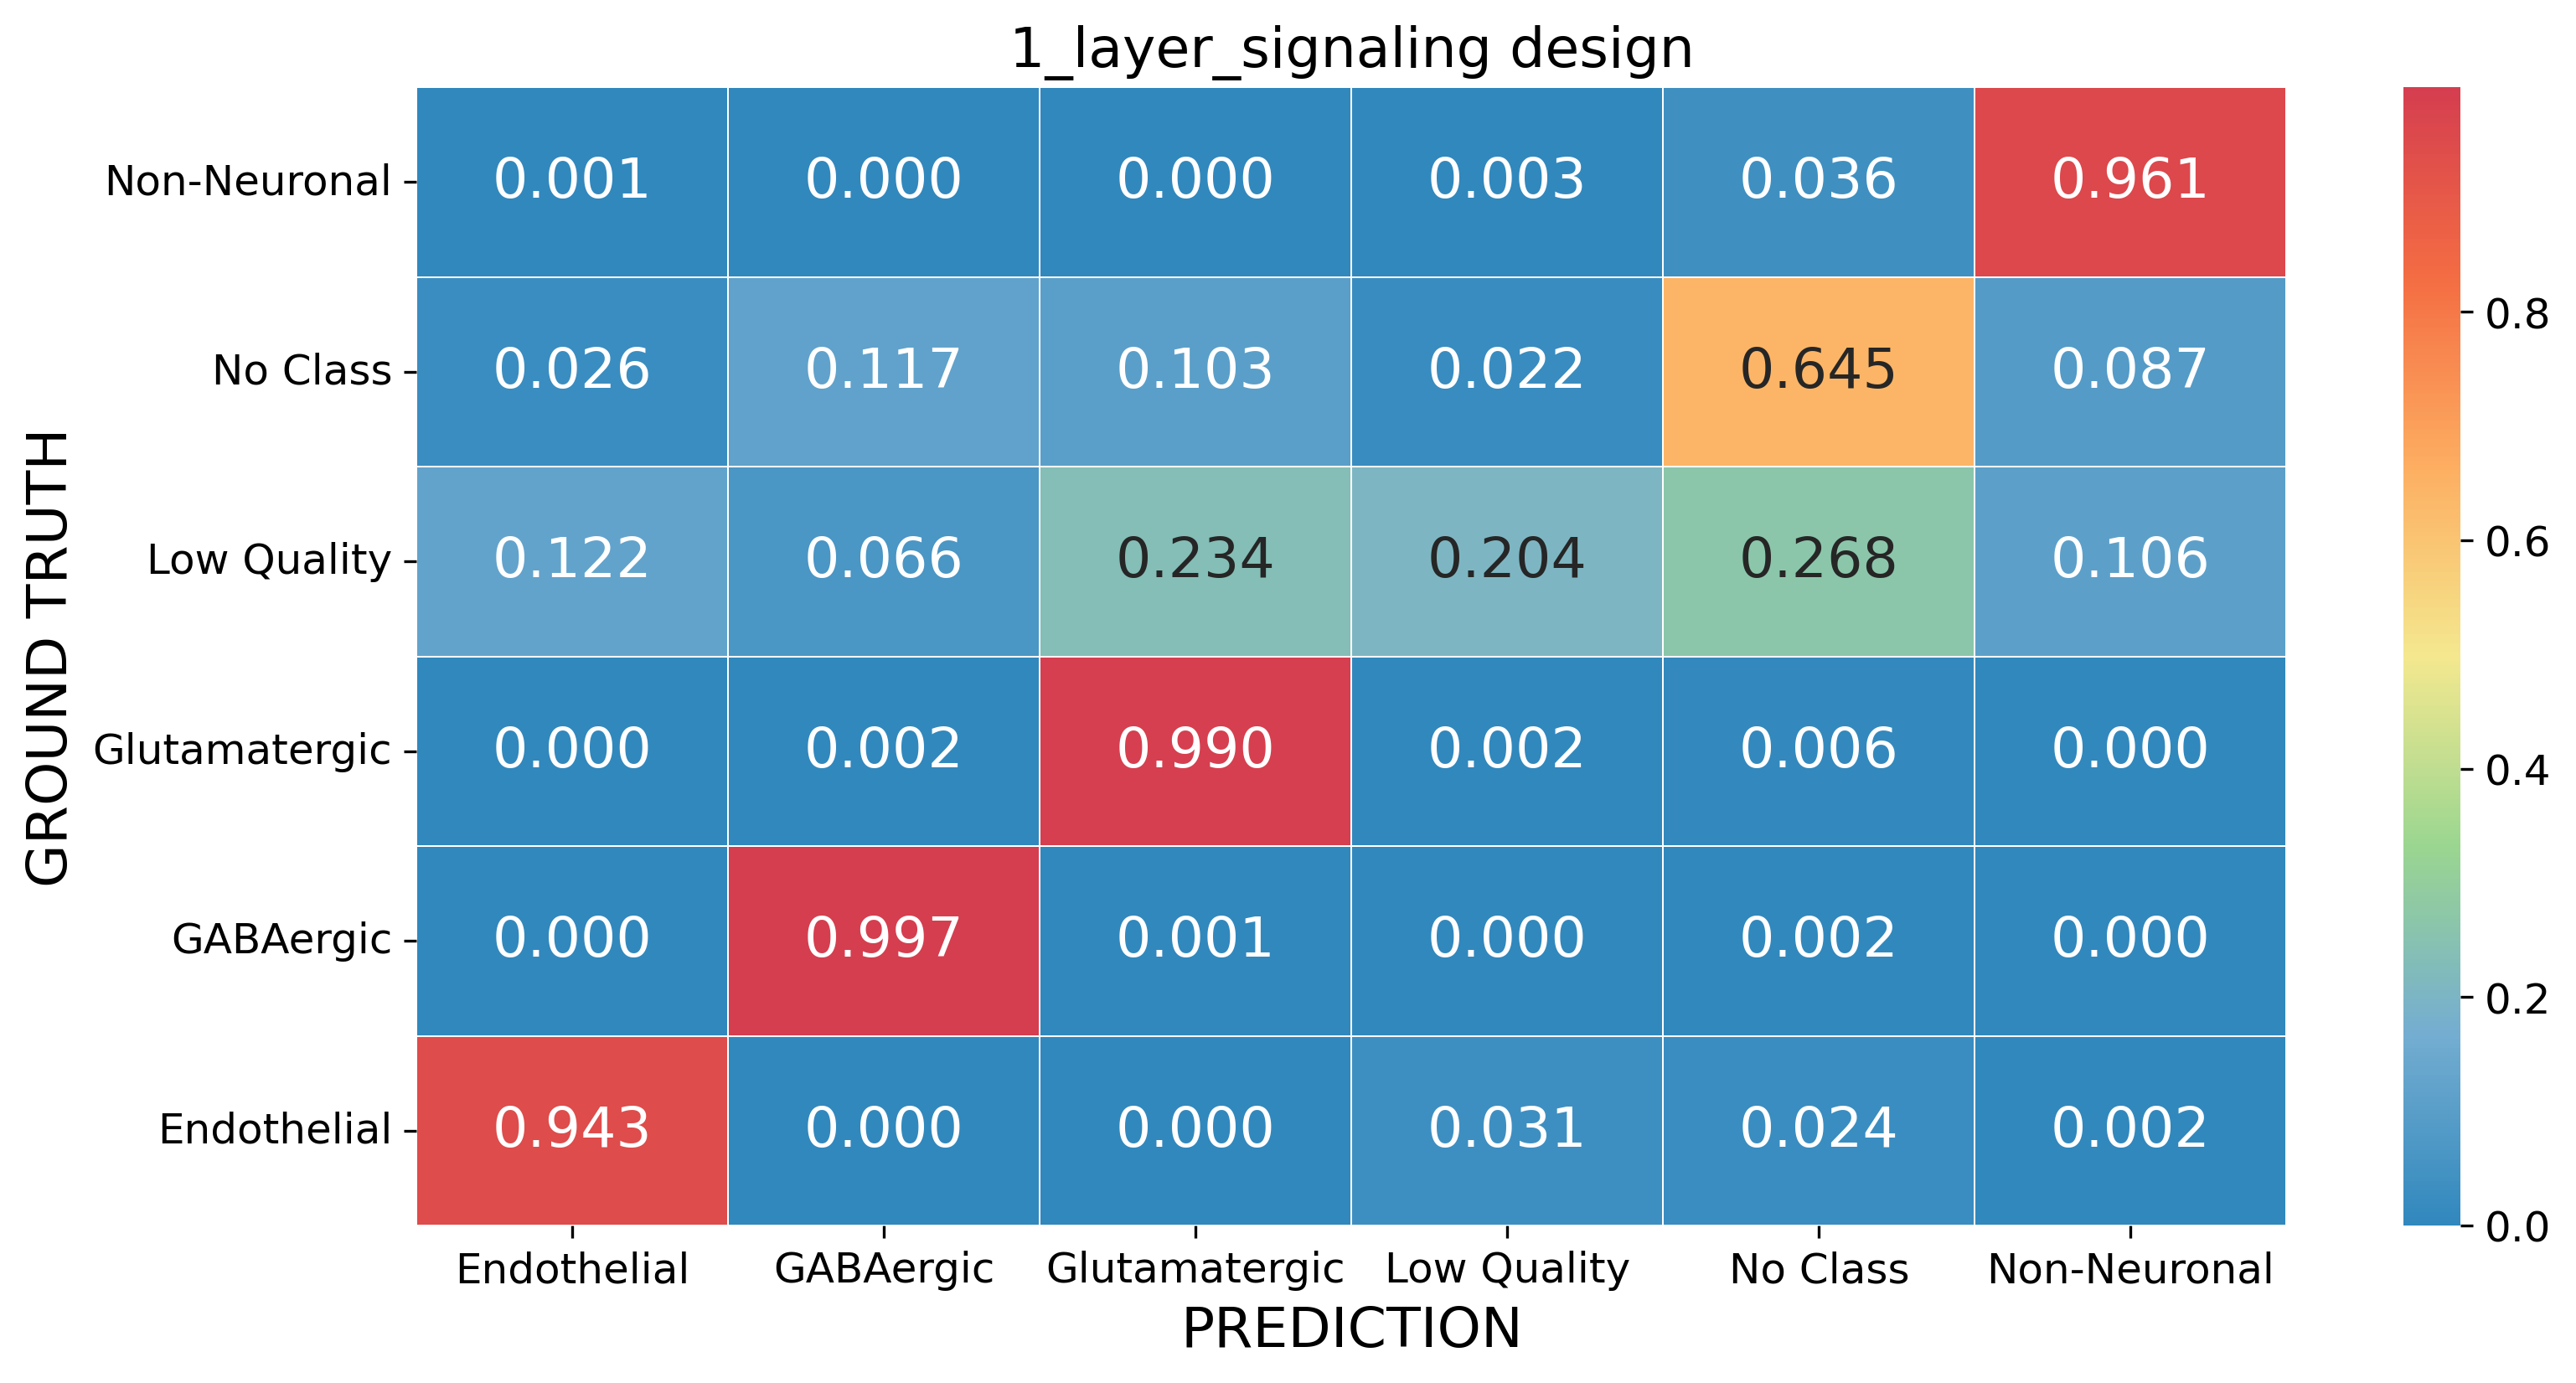

In [ ]:
Image("/content/drive/MyDrive/BIPN-162-Project/Additional Data Analysis/reports/evaluate/exper_melanoma/RepeatedStratifiedKFold/3_cm_1_layer_signaling.png", width=500, height=375)

The confusion matrix shows high accuracy in each cell type (more than 90%). For "Low Quality" and "No Class", the accuracy is low but it is normal because they are actually not cell types (which means that those are irrelevant information). Also, we can see that the confusion matrix for our additional dataset has very similar distribution as the one for the original dataset.

# Discussion and Conclusion

We get the results as expected because we have successfully reproduced the process with the similar and additional dataset with a high accuracy. The tested dataset was with a much more precise similarity, strongly supported that our replicated method performed well. In addition, the visualization we generated to validate the model also generated outstanding results. From the figure of distribution of activation scores, we could conclude the variety of signaling pathways of different cell types. From the encoding signaling 2D TSNE graphs, the data was represented with less dimensions by mething distributions. This is a clear sign that we minimize the divergence of the dataset. The successful validation of the additional dataset also proved the training set could fit in any given model, reinforcing the availability of this neural network. Cross validation was running after we generated the result; after training, our accuracy reached 100% at the end. Through this project, we successfully classified the cell types based on the biological characteristics from single cell RNA sequencing, and comparative results from different datasets suggested the large possibility of integrating pathways as prior knowledge with neural networks. Therefore we could utilize this collection of biological relevance to better understand the special functions of cells. 

Some parts of this project that need to improve would be the dataset we chose. For example, in the dataset, we identified cell types as “low quality” and “no class”, which should be removed at the beginning because they may negatively affect the performance of the neural network. Besides, as the paper suggested, other dataset included balanced and unbiased cell type data could be tested if needed to validate and train the NN. In addition, a larger dataset will cause the system to be crushed due to the RAM of the computer. In the process of doing the project, our group members used different ways to normalize the data and construct the environment, and at the beginning we failed several times. Things to notice that we could have done differently would be to start the project as early as possible, so that we could have more time to test. The important thing we recognize is when we choose the topic, we should recognize the feasibility of a topic being replicated as the project. 


# Feedback and Rebuttal

At the beginning of this project, the first topic we chose indeed had some aspects that did not relate to the project proposal rubric and guideline. For example, the old paper was a collection of the old methods instead of developing a new one. Some other parts were like vague statements and wording. After careful consideration, we decided to change the topic, which is the paper right now we are trying to reproduce and present in this project. 
